# 2024 Utah Real Estate Data exploration and Modeling 

# Intro
Overview:
This dataset contains real estate listings from Utah in year 2024. The dataset is comprised of 4400 entries and 14 columns. Attributes contained within the dataset include type, description, year built, number of bedrooms and bathrooms, garages, lot size, square footage, stories, listing price, status, and when the property was last sold. This data was ethically mined from Realtor.com using an API provided by Apify.

Source:
The dataset is from kaggle. Here's the link https://www.kaggle.com/datasets/kanchana1990/real-estate-data-utah-2024

# Content

<a href='#DescriptiveAnalysis'>Descriptive Analysis</a>

<a href='#uniquevalues'>Analysis of Unique Values</a>

<a href='#preprocessing'>Preprocessing of Data</a>

<a href='#DataAnalysis'>Data Analysis</a>

&emsp;<a href='#outliers'>Outliers</a>
    
&emsp;<a href='#distribution'>Distribution</a>
    
&emsp;<a href='#categoricalAnalysis'>Categorical Variable Analysis</a>
    
&emsp;<a href='#boxplots'>Boxplots of ListPrice vs Other Variables</a>
    
&emsp;<a href='#violinplots'>Violin Plots</a>
    
&emsp;<a href='#modelingPrepare'>Prepare Data For Modeling</a>

&emsp;<a href='#linearRegressionAssumptions'>Linear Regression Assumptions</a>
    
&emsp;&emsp;<a href='#linearity'>Linearity</a>
    
&emsp;&emsp;<a href='#homoscedasticity'>Homoscedasticity</a>
    
&emsp;&emsp;<a href='#multivariateNormality'>Multivariate Normality</a>
    
&emsp;&emsp;<a href='#autocorrelation'>Autocorrelation</a>
    
&emsp;&emsp;<a href='#multicollinearity'>Multicollinearity</a>
    
&emsp;<a href='#featureengineering'>Feature Engineering</a>
    
&emsp;&emsp;<a href='#reducemulticollinearity'>Reduce Multicollinearity</a>
    
&emsp;&emsp;<a href='#correlation'>Correlation</a>
    
&emsp;<a href='#dataReduction'>Data Reduction Analysis</a>
    
&emsp;<a href='#modeling'>Modeling</a>
    
&emsp;&emsp;<a href='#linearregression'>Linear Regression</a>
    
&emsp;&emsp;<a href='#ridgeregression'>Ridge Regression</a>
    
&emsp;&emsp;<a href='#polynomialregression'>Polynomial Regression</a>
    
&emsp;&emsp;<a href='#elasticnetregression'>Elastic Net Regression</a>
    
&emsp;&emsp;<a href='#ENTuned'>Elastic Net w/GridsearchCV Tuning</a>
    
&emsp;&emsp;<a href='#randomforest'>Random Forest Regression</a>
    
&emsp;&emsp;<a href='#RFTuned'>Random Forest w/RandomizedCV Tuning</a>

<a id='DescriptiveAnalysis'>

# Descriptive Analysis

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

data = pd.read_csv("real_estate_utah.csv")
print(data.columns)

Index(['type', 'text', 'year_built', 'beds', 'baths', 'baths_full',
       'baths_half', 'garage', 'lot_sqft', 'sqft', 'stories', 'lastSoldOn',
       'listPrice', 'status'],
      dtype='object')


In [2]:
print(data.dtypes)

type           object
text           object
year_built    float64
beds          float64
baths         float64
baths_full    float64
baths_half    float64
garage        float64
lot_sqft      float64
sqft          float64
stories       float64
lastSoldOn     object
listPrice     float64
status         object
dtype: object


In [3]:
print(data.shape)

(4440, 14)


In [4]:
print(data.head())

            type                                               text  \
0  single_family  Escape to tranquility with this off-grid, unfi...   
1  single_family  Beautiful home in the desirable Oak Hills and ...   
2  single_family  Welcome to your new home, nestled in the heart...   
3  single_family  Investment Opportunity. House needs some work ...   
4           land  Deer Springs Ranch is an 8000 Ac Ranch in an H...   

   year_built  beds  baths  baths_full  baths_half  garage  lot_sqft    sqft  \
0      2020.0   1.0    1.0         1.0         1.0     2.0   71438.0   696.0   
1      1968.0   4.0    3.0         2.0         1.0     2.0   56628.0  3700.0   
2      1985.0   4.0    3.0         3.0         1.0     1.0   10019.0  3528.0   
3      1936.0   4.0    2.0         2.0         1.0     2.0   12632.0  2097.0   
4      2003.0   4.0    0.0         2.0         1.0     2.0  872071.0  2400.0   

   stories  lastSoldOn  listPrice    status  
0      2.0  2018-05-31    90000.0  for_sale  


In [5]:
#check for Nan value counts
print(data.isna().sum())

type          0
text          0
year_built    0
beds          0
baths         0
baths_full    0
baths_half    0
garage        0
lot_sqft      0
sqft          0
stories       0
lastSoldOn    0
listPrice     0
status        0
dtype: int64


In [6]:
print(data.describe().T)

             count           mean           std     min       25%       50%  \
year_built  4440.0    1997.942793  2.360907e+01  1860.0    1997.0    2003.0   
beds        4440.0       3.894595  1.265647e+00     1.0       3.0       4.0   
baths       4440.0       2.454730  1.789238e+00     0.0       2.0       3.0   
baths_full  4440.0       2.238964  1.165071e+00     1.0       2.0       2.0   
baths_half  4440.0       1.025000  1.946716e-01     1.0       1.0       1.0   
garage      4440.0       2.334234  1.024810e+00     0.0       2.0       2.0   
lot_sqft    4440.0  552523.948649  1.134471e+07   436.0    9583.0   13939.0   
sqft        4440.0    2712.318243  1.553676e+03     0.0    1842.0    2400.0   
stories     4440.0       1.999775  6.291342e-01     1.0       2.0       2.0   
listPrice   4440.0  796604.380631  1.731703e+06     0.0  353805.0  528995.0   

                 75%          max  
year_built    2007.0       2026.0  
beds             4.0         19.0  
baths            3.0  

<a id='uniquevalues'>

# ANALYSIS OF UNIQUE VALUES

In [7]:
print(pd.DataFrame(data.nunique(), columns=["UniqueValuesCount"]))

            UniqueValuesCount
type                       11
text                     3991
year_built                140
beds                       12
baths                      16
baths_full                 14
baths_half                  5
garage                     16
lot_sqft                  554
sqft                     2176
stories                     4
lastSoldOn               1250
listPrice                1667
status                      2


In [8]:
print(data.stories.value_counts())

2.0    2794
1.0     842
3.0     767
4.0      37
Name: stories, dtype: int64


In [9]:
print(data.garage.value_counts())

2.0     3102
3.0      778
1.0      247
4.0      198
5.0       35
6.0       29
8.0       21
7.0       13
10.0       8
9.0        3
20.0       1
0.0        1
14.0       1
12.0       1
15.0       1
11.0       1
Name: garage, dtype: int64


In [10]:
print(data.baths_half.value_counts())

1.0    4352
2.0      69
3.0      17
6.0       1
4.0       1
Name: baths_half, dtype: int64


In [11]:
print(data.baths_full.value_counts())

2.0     2607
3.0      824
1.0      681
4.0      214
5.0       59
6.0       34
7.0       10
8.0        3
13.0       2
12.0       2
9.0        1
11.0       1
45.0       1
10.0       1
Name: baths_full, dtype: int64


In [12]:
print(data.baths.value_counts())

3.0     1511
2.0      993
0.0      814
4.0      544
1.0      265
5.0      165
6.0       75
7.0       24
8.0       22
9.0       10
10.0       7
14.0       3
13.0       3
11.0       2
45.0       1
12.0       1
Name: baths, dtype: int64


In [13]:
print(data.beds.value_counts())

4.0     1725
3.0     1311
5.0      571
2.0      310
6.0      302
7.0       94
1.0       77
8.0       34
9.0       11
11.0       3
19.0       1
14.0       1
Name: beds, dtype: int64


In [14]:
print(data.status.value_counts())

for_sale          4185
ready_to_build     255
Name: status, dtype: int64


In [15]:
print(data['type'].value_counts())

single_family                  2883
land                            801
townhomes                       344
mobile                          206
condos                          156
townhouse                        14
other                            12
farm                              9
condo_townhome_rowhome_coop       8
condo_townhome                    6
condo                             1
Name: type, dtype: int64


In [16]:
#analyze beds column
print(data["beds"].value_counts())

4.0     1725
3.0     1311
5.0      571
2.0      310
6.0      302
7.0       94
1.0       77
8.0       34
9.0       11
11.0       3
19.0       1
14.0       1
Name: beds, dtype: int64


In [17]:
#analyze baths column
print(data['baths'].value_counts())

3.0     1511
2.0      993
0.0      814
4.0      544
1.0      265
5.0      165
6.0       75
7.0       24
8.0       22
9.0       10
10.0       7
14.0       3
13.0       3
11.0       2
45.0       1
12.0       1
Name: baths, dtype: int64


In [18]:
print(data['year_built'].value_counts())

2003.0    1690
2024.0     229
2022.0      98
2023.0      97
2021.0      90
          ... 
1885.0       1
1891.0       1
1899.0       1
1881.0       1
1883.0       1
Name: year_built, Length: 140, dtype: int64


In [19]:
print(data.lastSoldOn.value_counts())

2018-05-31    2969
2022-07-01       5
2020-07-10       4
2020-06-26       4
2019-07-01       4
              ... 
2018-08-30       1
2013-09-10       1
2012-08-14       1
2010-04-12       1
2016-02-26       1
Name: lastSoldOn, Length: 1250, dtype: int64


<a id='preprocessing'>

# PREPROCESSING OF DATA

In [20]:
#Start preprocessing of "type" column
#merge similar categories
townHomesChange = ["townhomes", "townhouse"]
condoChange = ["condos", "condo_townhome_rowhome_coop", "condo_townhome"]
data.loc[data["type"].isin(townHomesChange), "type"] = "townhome"
data.loc[data["type"].isin(condoChange), "type"] = "condo"
#print(data["type"].value_counts())

In [21]:
#start preprocessing of "text column"
#delete column, not needed for analysis
data.drop(columns=["text"], axis=1, inplace=True)
#print(data.head())

In [22]:
#preprocessing of "year_built column"
#print(data["year_built"].value_counts())
#Change data type to int
data["year_built"] = data["year_built"].astype('int')
#print(data.dtypes)

In [23]:
#create an age column derived from year_built column
data['age'] = pd.to_datetime('today').year - data['year_built']

In [24]:
#convert lastSoldOn col to dateTime
data['lastSoldOn'] = pd.to_datetime(data['lastSoldOn'])

In [25]:
#change stories to int
data["stories"] = data["stories"].astype('int')

In [26]:
#change beds to int
data['beds'] = data['beds'].astype('int')

In [27]:
#change garage to int
data['garage'] = data['garage'].astype('int')

In [28]:
#validate changes
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4440 entries, 0 to 4439
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   type        4440 non-null   object        
 1   year_built  4440 non-null   int64         
 2   beds        4440 non-null   int64         
 3   baths       4440 non-null   float64       
 4   baths_full  4440 non-null   float64       
 5   baths_half  4440 non-null   float64       
 6   garage      4440 non-null   int64         
 7   lot_sqft    4440 non-null   float64       
 8   sqft        4440 non-null   float64       
 9   stories     4440 non-null   int64         
 10  lastSoldOn  4440 non-null   datetime64[ns]
 11  listPrice   4440 non-null   float64       
 12  status      4440 non-null   object        
 13  age         4440 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(5), object(2)
memory usage: 485.8+ KB
None


<a id='DataAnalysis'>

# DATA ANALYSIS

<a id='outliers'>

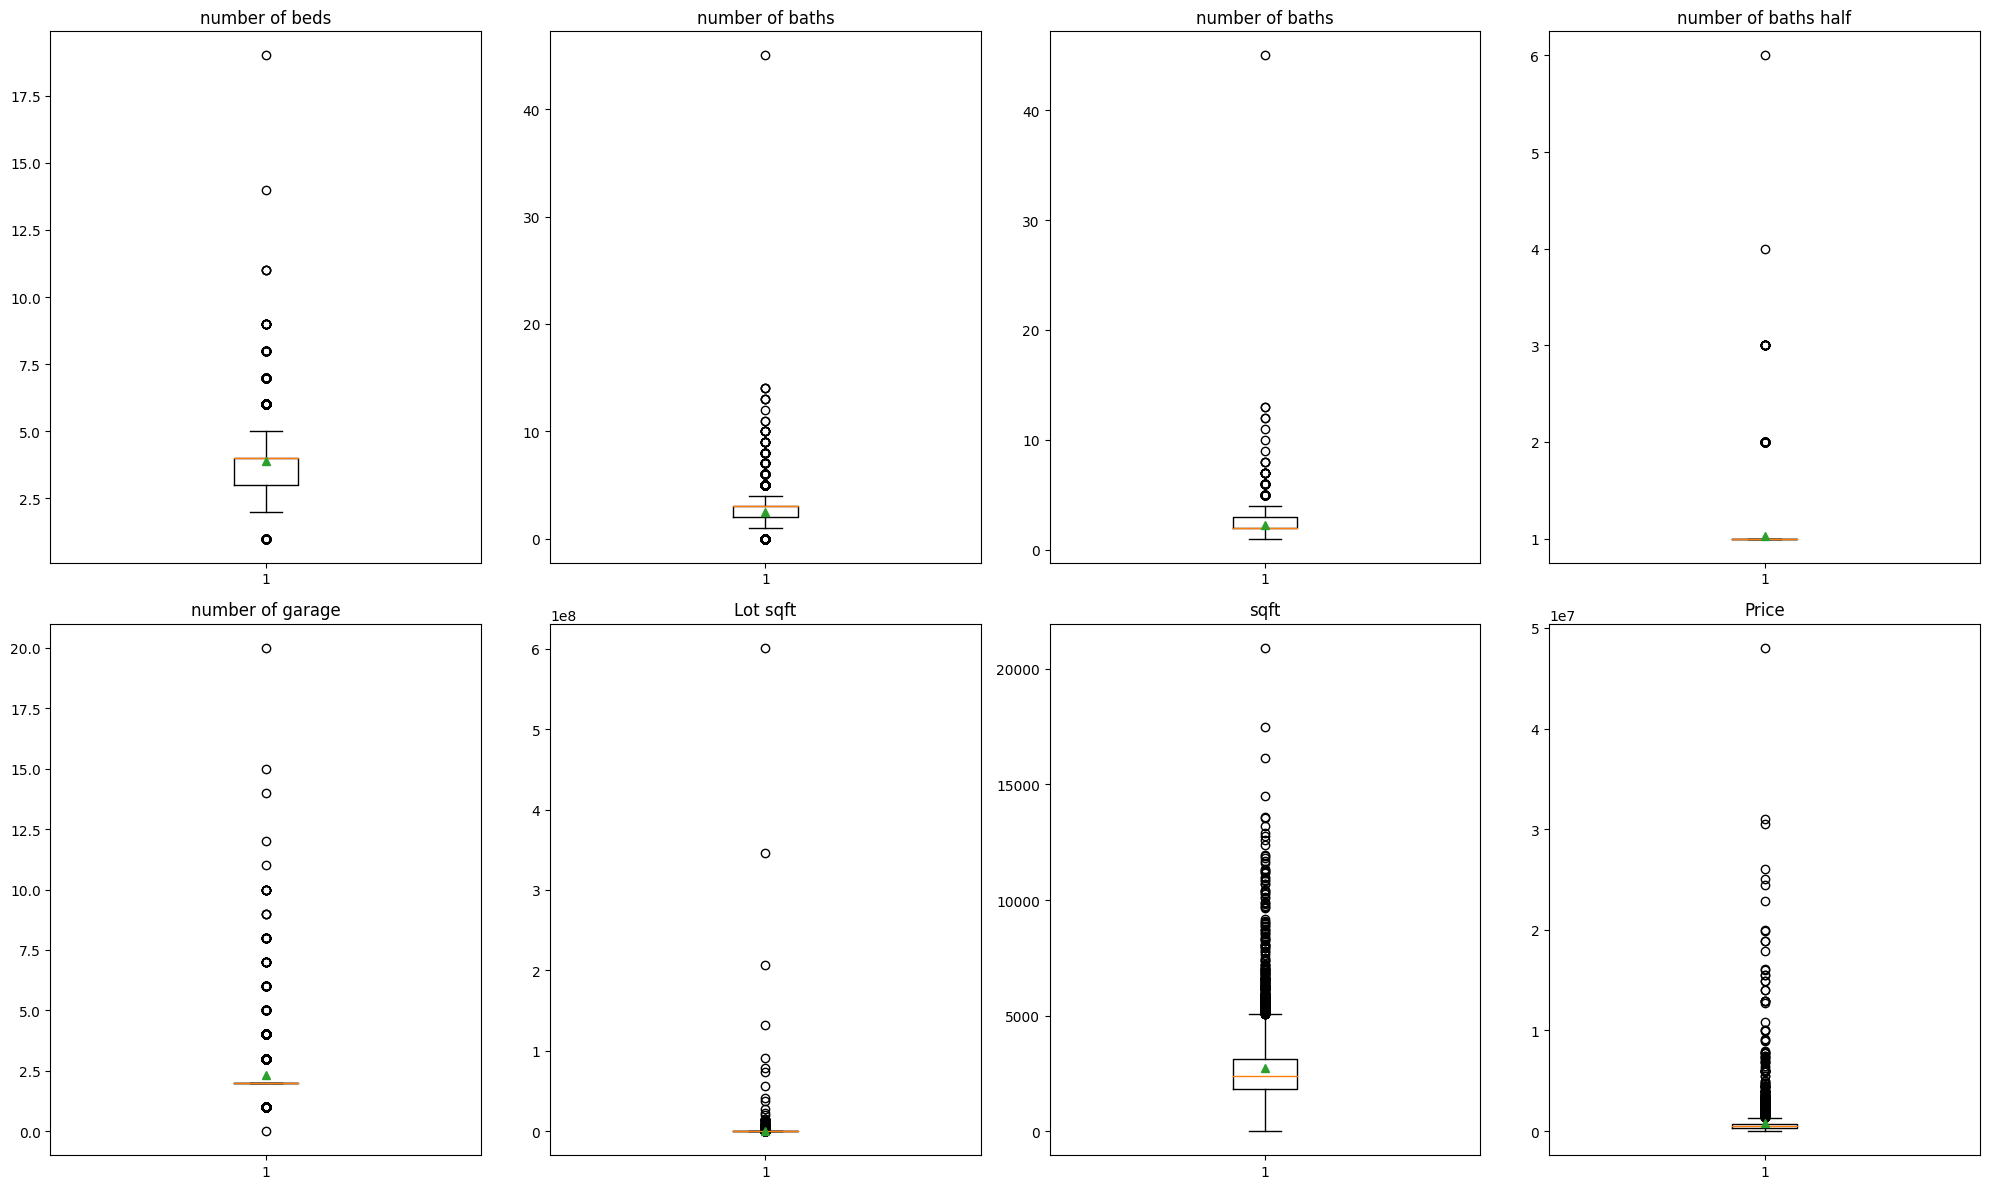

In [29]:
#Outliers
fig, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2,4, figsize=(20,12))

ax1.boxplot(data['beds'], showmeans=True)
ax1.set_title("number of beds")

ax2.boxplot(data['baths'], showmeans=True)
ax2.set_title('number of baths')

ax3.boxplot(data['baths_full'], showmeans=True)
ax3.set_title('number of baths')

ax4.boxplot(data['baths_half'], showmeans=True)
ax4.set_title('number of baths half')

ax5.boxplot(data['garage'], showmeans=True)
ax5.set_title('number of garage')

ax6.boxplot(data['lot_sqft'], showmeans=True)
ax6.set_title("Lot sqft")

ax7.boxplot(data['sqft'], showmeans=True)
ax7.set_title("sqft")

ax8.boxplot(data['listPrice'], showmeans=True)
ax8.set_title("Price")

plt.tight_layout()
plt.show()

In [30]:
#Remove outliers
def remove_outliers(df, columns):
    #Remove outliers using IQR method
    #df (pd.DataFrame): input dataframe
    #columns: list of columns to check for outliers
    #return: dataframe with outliers removed
    
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1 #IQR = Q3 - Q1
        
        lower = Q1 - (1.5*IQR) #Min = 25% - 1.5*IQR 
        upper = Q3 + (1.5*IQR) #Max = 75% + 1.5*IQR
        
        df = df[(df[column] >= lower) & (df[column] <= upper)] #within range = Min <= Value <= Max
        
    return df

In [31]:
cols_check = ['beds', 'baths', 'sqft', 'listPrice', 'lot_sqft']
dfClean = remove_outliers(data, cols_check)

In [32]:
dfClean.reset_index(drop=True, inplace=True)

In [33]:
print(dfClean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2858 entries, 0 to 2857
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   type        2858 non-null   object        
 1   year_built  2858 non-null   int64         
 2   beds        2858 non-null   int64         
 3   baths       2858 non-null   float64       
 4   baths_full  2858 non-null   float64       
 5   baths_half  2858 non-null   float64       
 6   garage      2858 non-null   int64         
 7   lot_sqft    2858 non-null   float64       
 8   sqft        2858 non-null   float64       
 9   stories     2858 non-null   int64         
 10  lastSoldOn  2858 non-null   datetime64[ns]
 11  listPrice   2858 non-null   float64       
 12  status      2858 non-null   object        
 13  age         2858 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(5), object(2)
memory usage: 312.7+ KB
None


<a id='distribution'>

## DISTRIBUTION

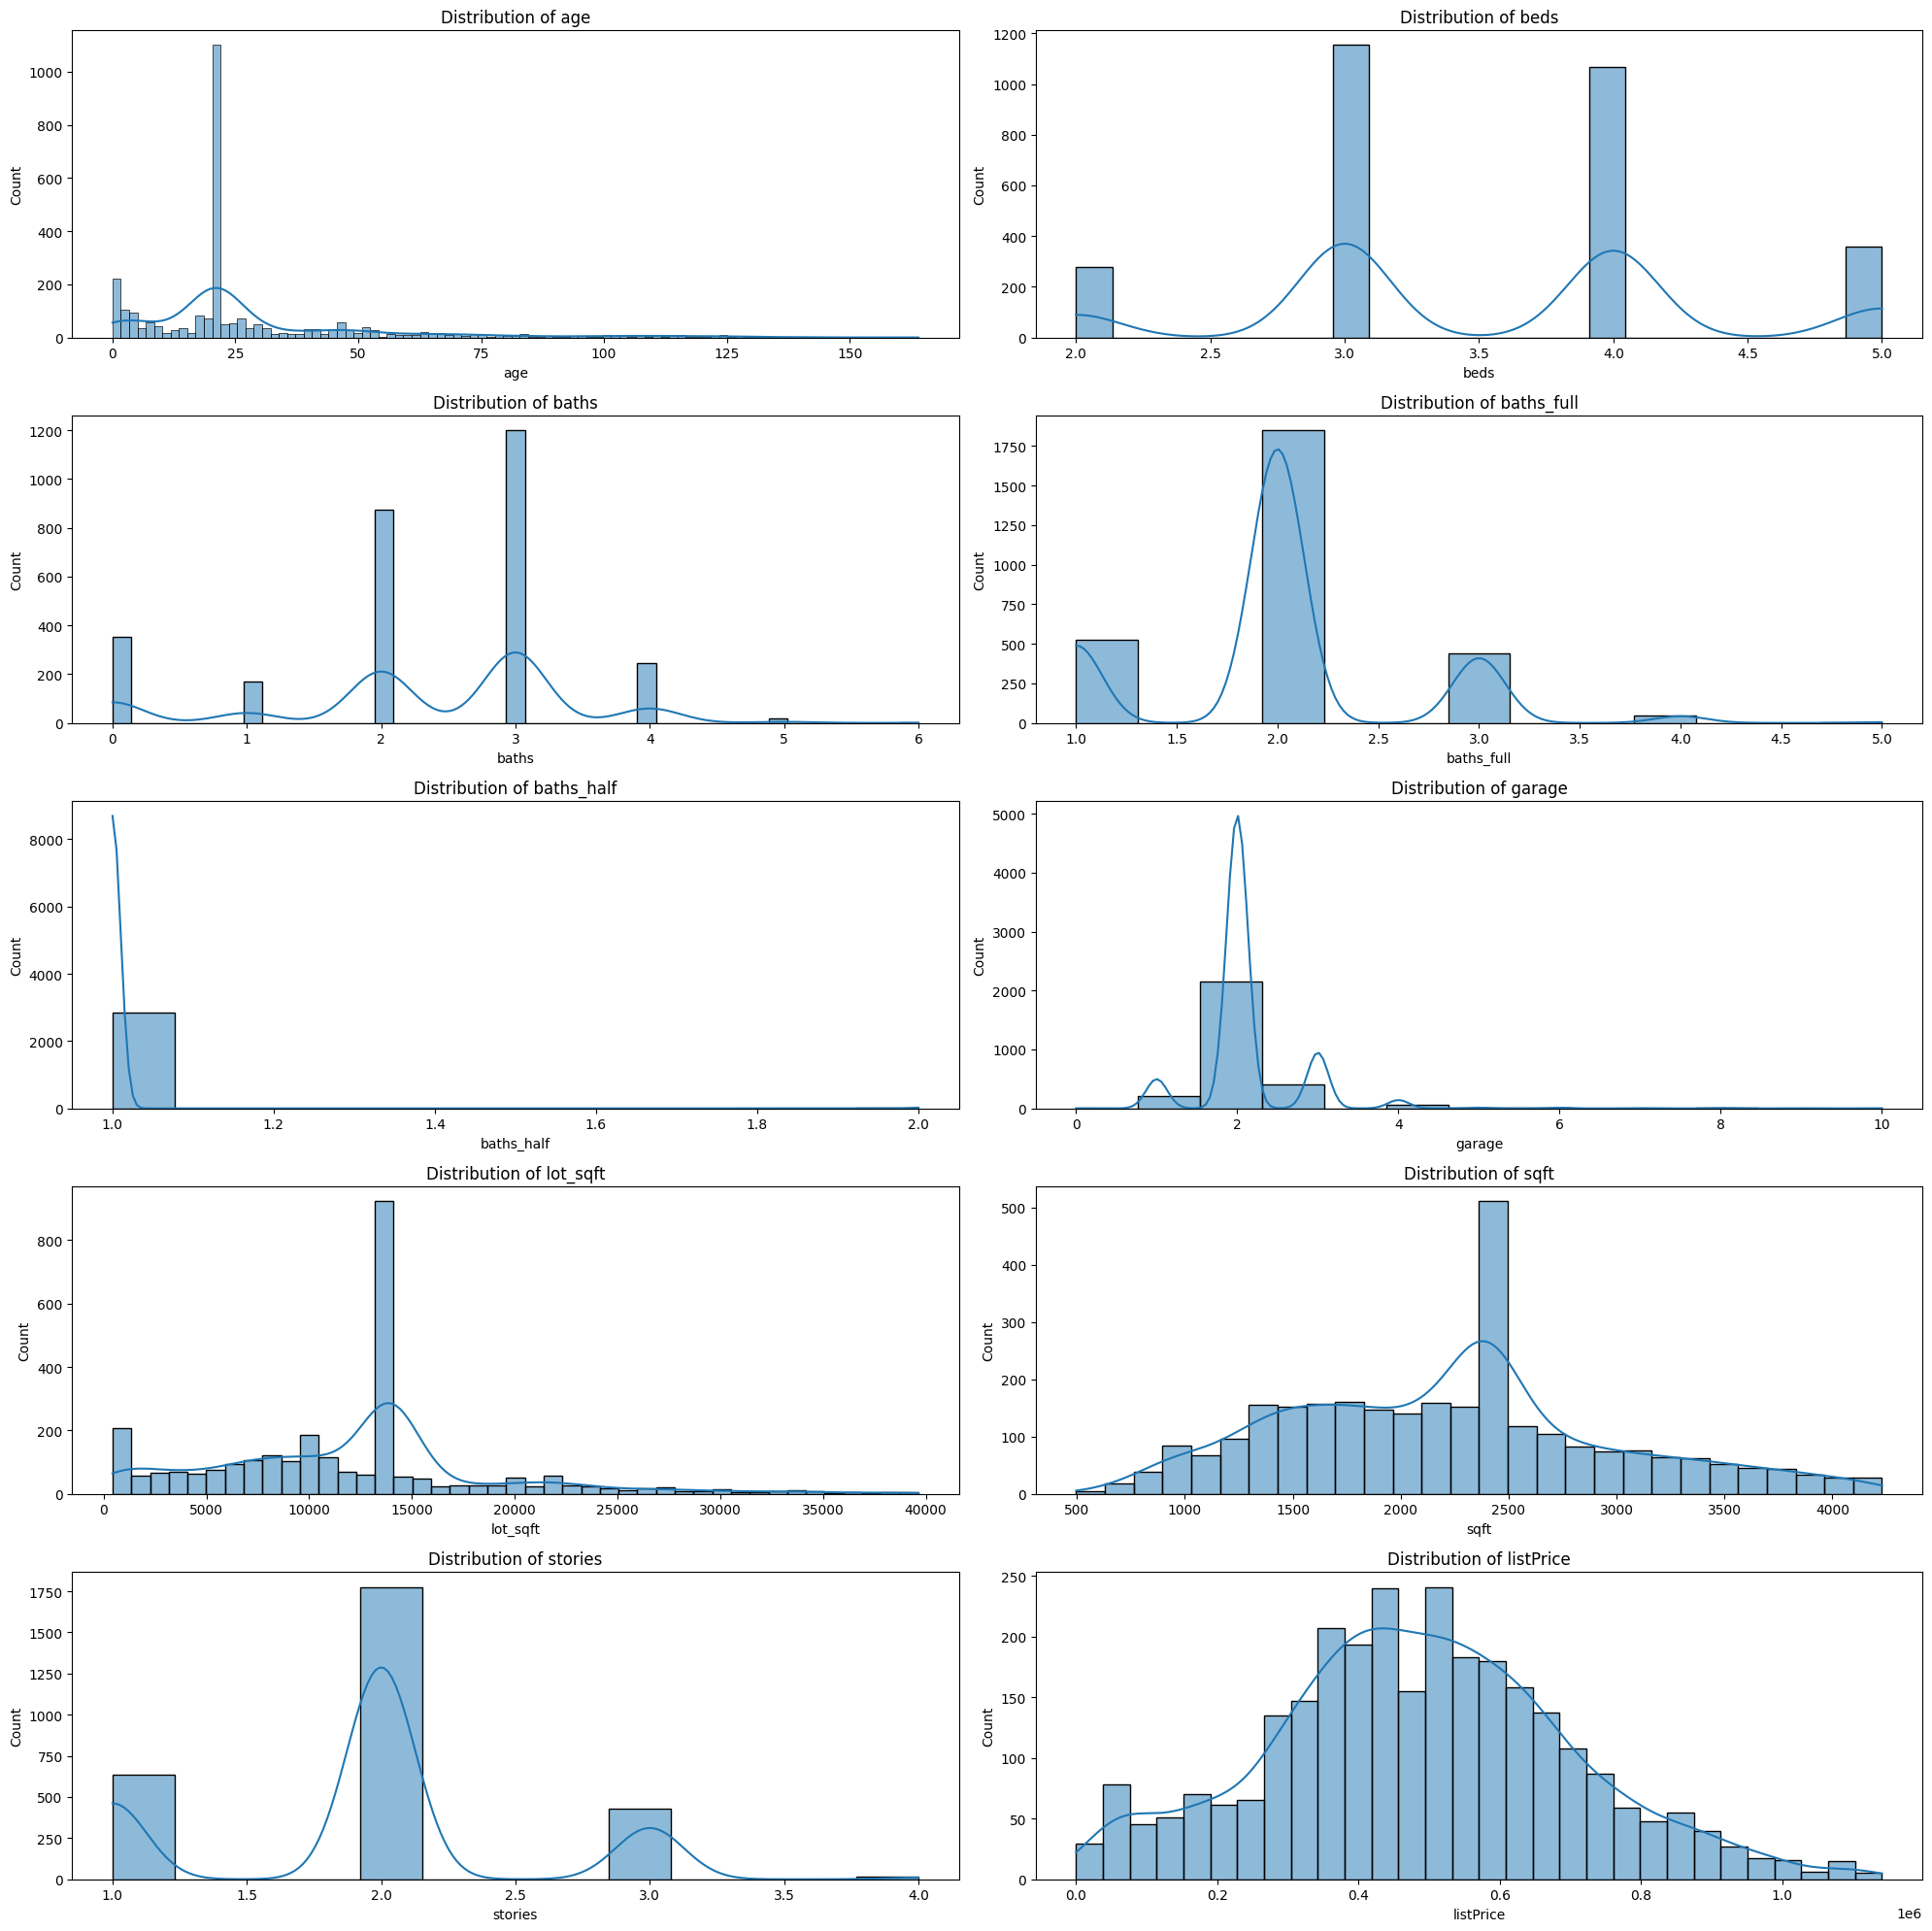

In [34]:
#plot distribution of numeric features
import seaborn as sns
numeric_cols = ['age', 'beds', 'baths', 'baths_full','baths_half','garage','lot_sqft', 'sqft','stories','listPrice']

plt.figure(figsize=(20, 20))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(5,2,i) #place graph on 5x2 grid at index i
    sns.histplot(dfClean[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

<Figure size 1000x1200 with 0 Axes>

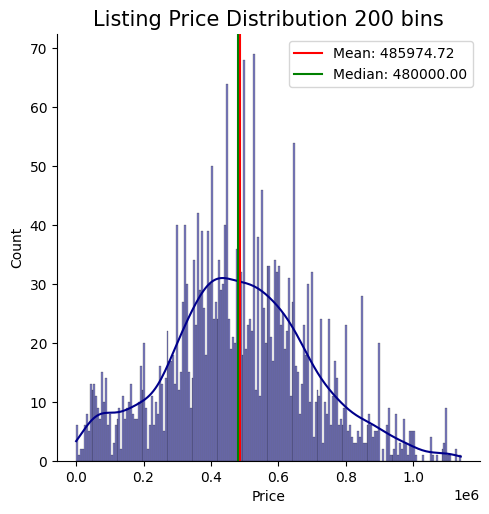

In [35]:
#analyze listing price distribution
mean = dfClean["listPrice"].mean()
median = dfClean["listPrice"].median()

plt.figure(figsize=(10,12))
sns.displot(bins=200, x=dfClean["listPrice"], color='darkblue', kde=True)
plt.axvline(mean, color='red', label=f'Mean: {mean:.2f}') #add vertical line
plt.axvline(median, color='green', label=f'Median: {median:.2f}') #add vertical line
plt.title("Listing Price Distribution 200 bins", fontsize=15)
plt.xlabel("Price",fontsize=10)
plt.legend()
plt.show()

In [36]:
print(dfClean['listPrice'].skew())

0.14954310497302434


In [37]:
#calculate bins for sqft variable/feature using Scotts Rule
bins1 = np.histogram_bin_edges(dfClean['sqft'], bins='scott')
print(bins1)

[ 496.   682.7  869.4 1056.1 1242.8 1429.5 1616.2 1802.9 1989.6 2176.3
 2363.  2549.7 2736.4 2923.1 3109.8 3296.5 3483.2 3669.9 3856.6 4043.3
 4230. ]


<Figure size 1000x1200 with 0 Axes>

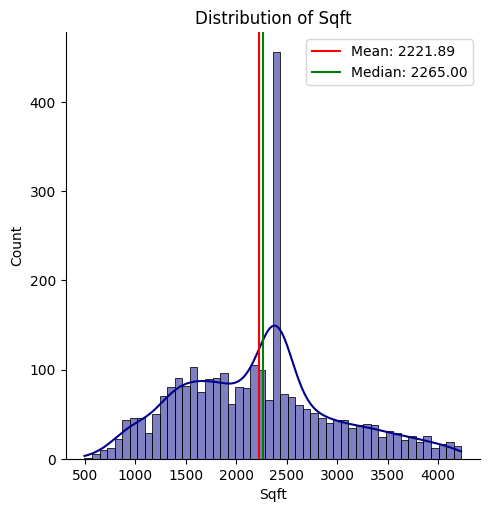

In [38]:
#analyze the sqft distribution
mean = dfClean['sqft'].mean()
median = dfClean['sqft'].median()

#build the graph
plt.figure(figsize=(10,12))
sns.displot(bins=50, x=dfClean['sqft'], color='darkblue', kde=True)
plt.axvline(mean, color='red', label=f'Mean: {mean:.2f}')
plt.axvline(median, color='green', label=f'Median: {median:.2f}')
plt.title("Distribution of Sqft")
plt.xlabel("Sqft")
plt.legend()
plt.show()

In [39]:
print(dfClean["sqft"].skew())

0.3566129551622008


<Figure size 1000x1200 with 0 Axes>

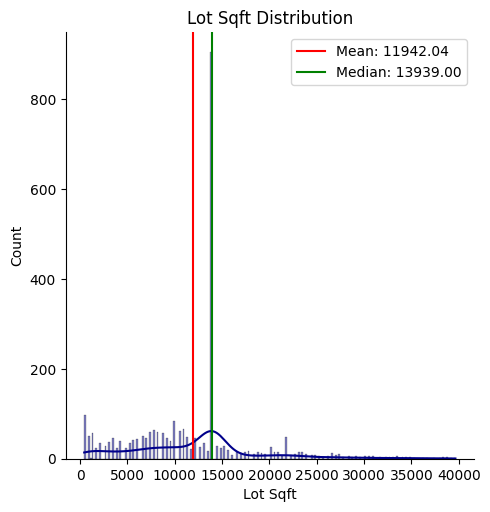

In [40]:
mean = dfClean["lot_sqft"].mean()
median = dfClean["lot_sqft"].median()

plt.figure(figsize=(10,12))
sns.displot(bins=200, x=dfClean["lot_sqft"], color='darkblue', kde=True)
plt.axvline(mean, color='red', label=f'Mean: {mean:.2f}')
plt.axvline(median, color='green', label=f'Median: {median:.2f}')
plt.title("Lot Sqft Distribution")
plt.xlabel("Lot Sqft")
plt.legend()
plt.show()

In [41]:
print(dfClean.lot_sqft.skew())

0.7644120638252829


<a id='categoricalAnalysis'>

## Categorical Variable Analysis

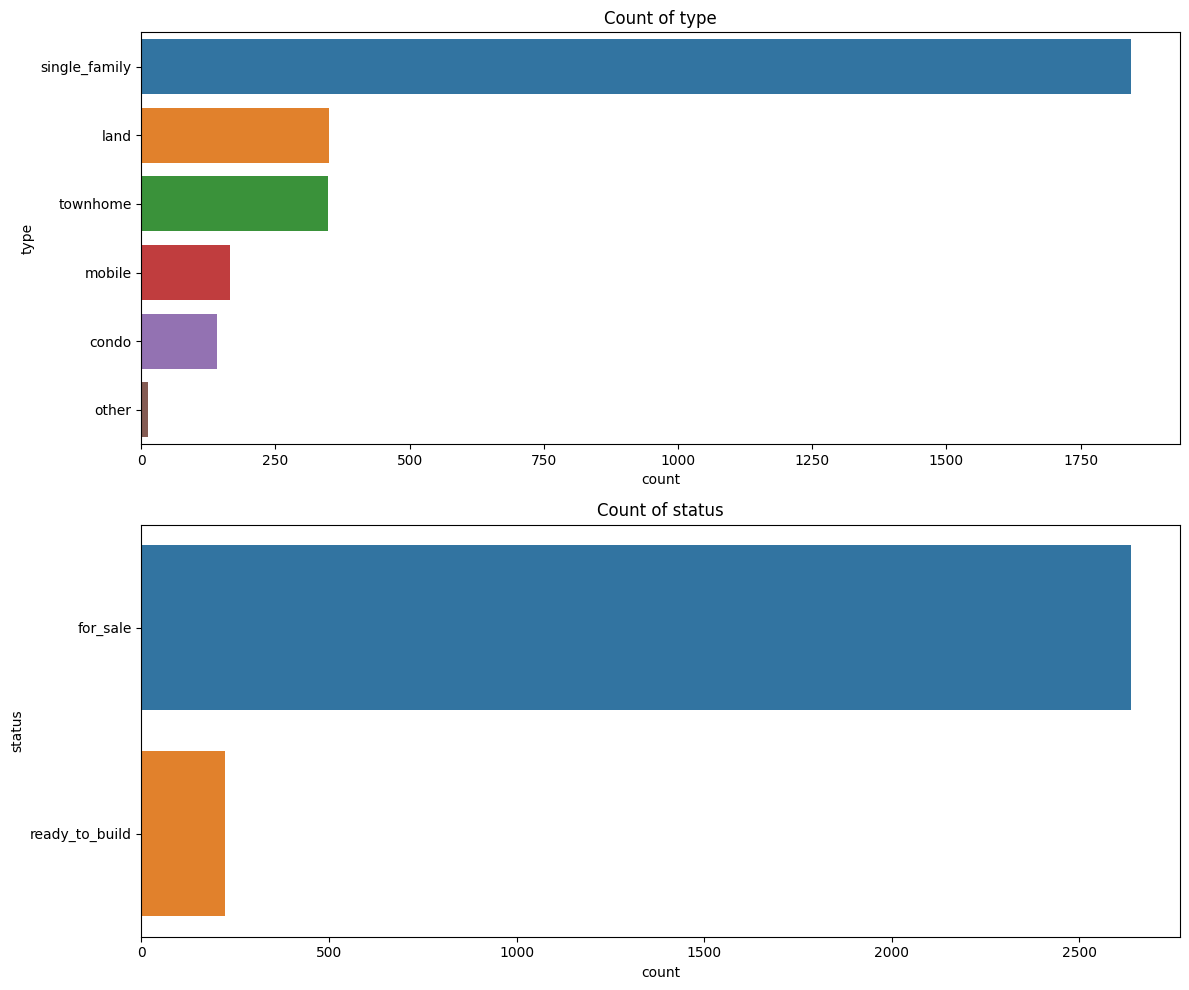

In [42]:
categorical_cols = ['type', 'status']

plt.figure(figsize=(12,10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2,1,i)
    sns.countplot(y=dfClean[col], order=dfClean[col].value_counts().index)
    plt.title(f'Count of {col}')
    
plt.tight_layout()
plt.show()

<a id='boxplots'>

### Box plot ListPrice vs Other variables

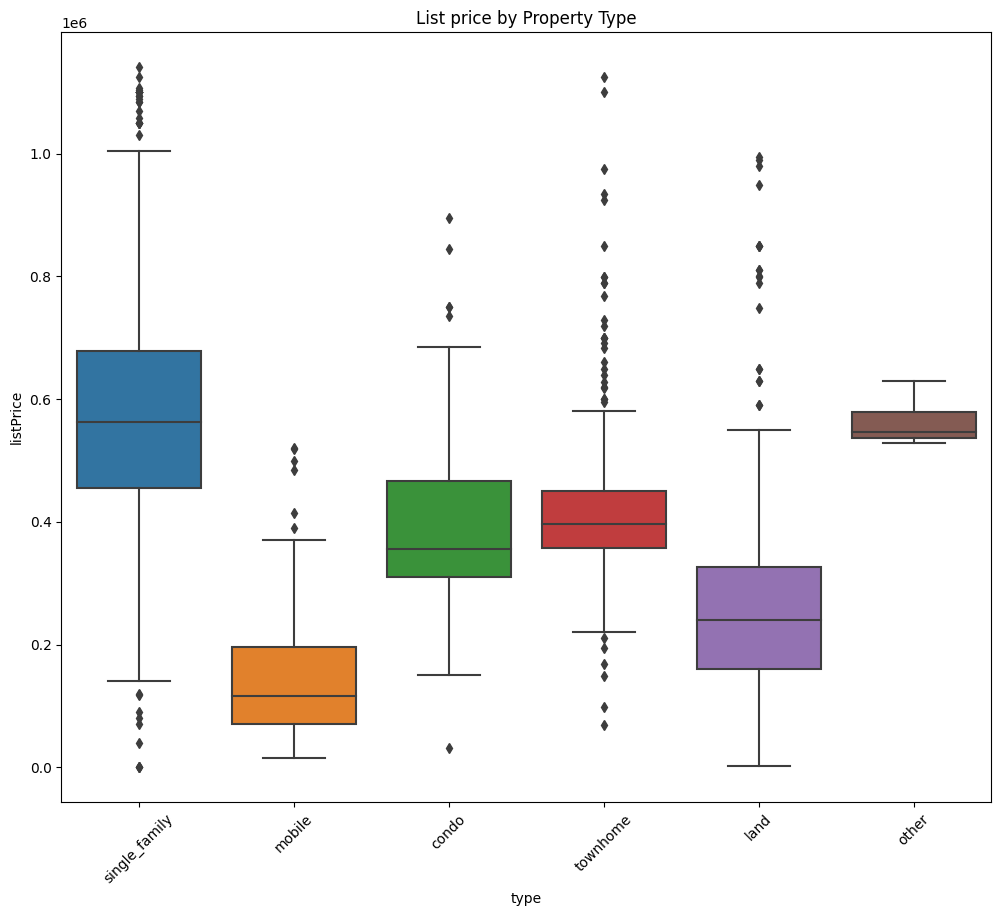

In [43]:
#vs type
plt.figure(figsize=(12,10))
sns.boxplot(x='type', y='listPrice', data=dfClean)
plt.title('List price by Property Type')
plt.xticks(rotation=45)
plt.show()

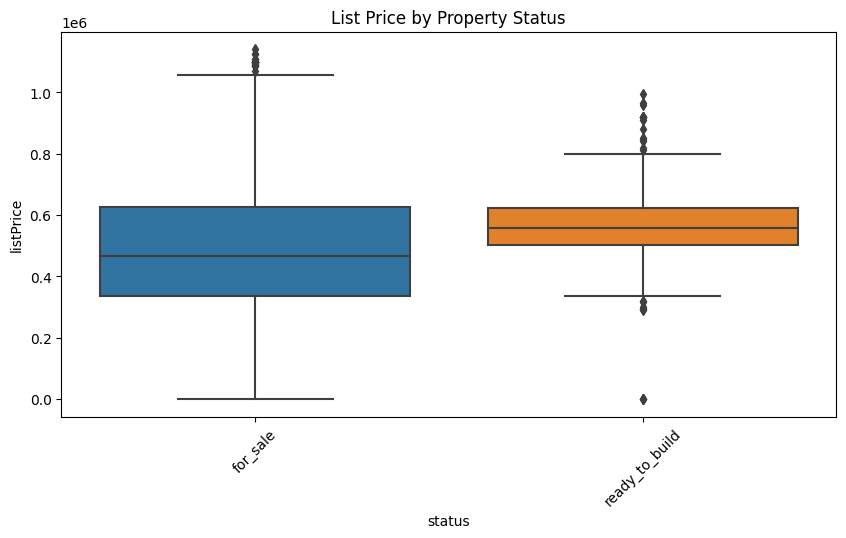

In [44]:
#vs status
plt.figure(figsize=(10,5))
sns.boxplot(y="listPrice", x="status", data=dfClean)
plt.title("List Price by Property Status")
plt.xticks(rotation=45)
plt.show()

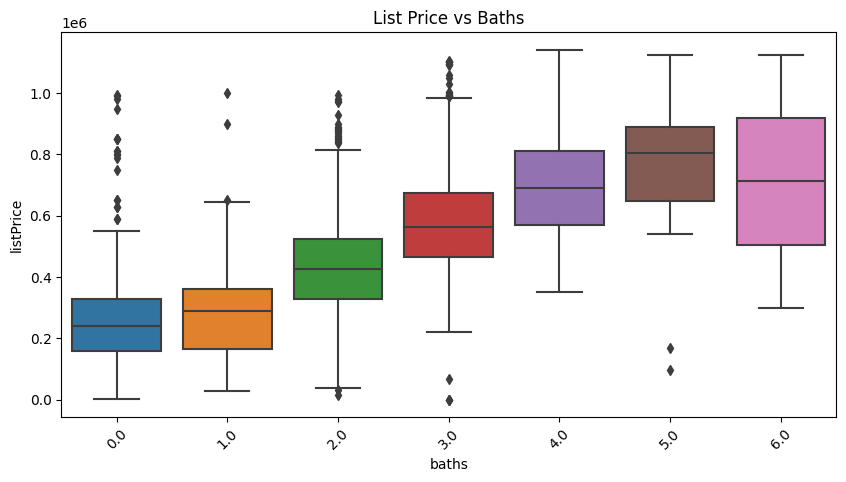

In [45]:
#vs baths
plt.figure(figsize=(10,5))
sns.boxplot(y='listPrice', x='baths', data=dfClean)
plt.title("List Price vs Baths")
plt.xticks(rotation=45)
plt.show()

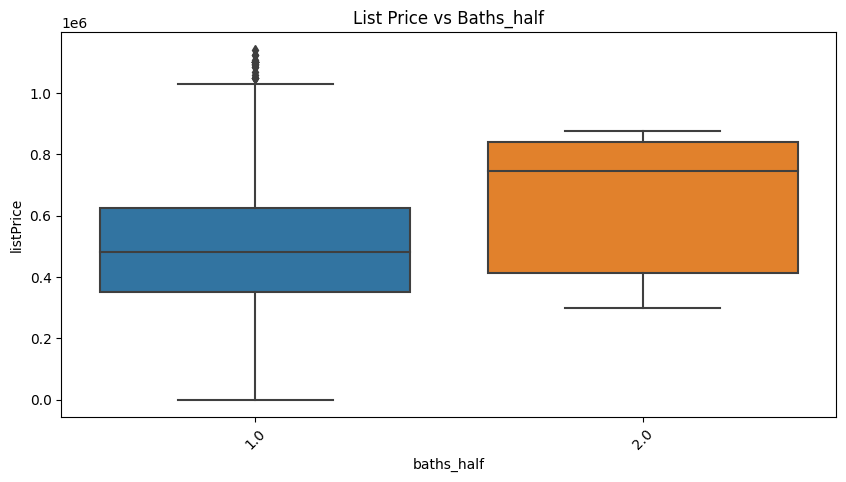

In [46]:
#vs baths_half
plt.figure(figsize=(10,5))
sns.boxplot(y='listPrice', x='baths_half', data=dfClean)
plt.title("List Price vs Baths_half")
plt.xticks(rotation=45)
plt.show()

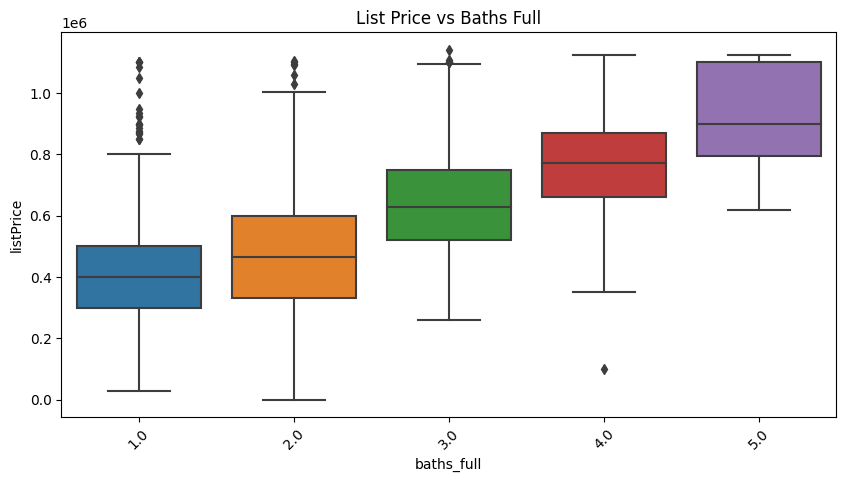

In [47]:
#vs baths full
plt.figure(figsize=(10,5))
sns.boxplot(y='listPrice', x='baths_full', data=dfClean)
plt.title("List Price vs Baths Full")
plt.xticks(rotation=45)
plt.show()

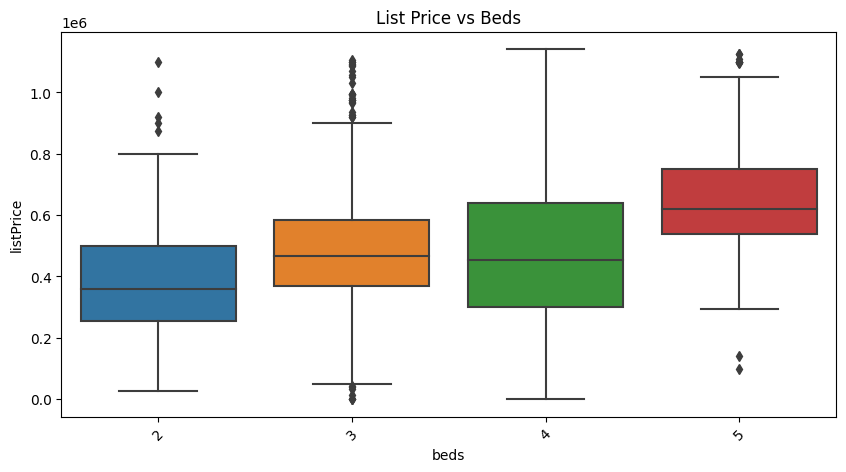

In [48]:
#vs beds
plt.figure(figsize=(10,5))
sns.boxplot(y="listPrice", x="beds", data=dfClean)
plt.title("List Price vs Beds")
plt.xticks(rotation=45)
plt.show()

<a id='violinplots'>

<function matplotlib.pyplot.show(close=None, block=None)>

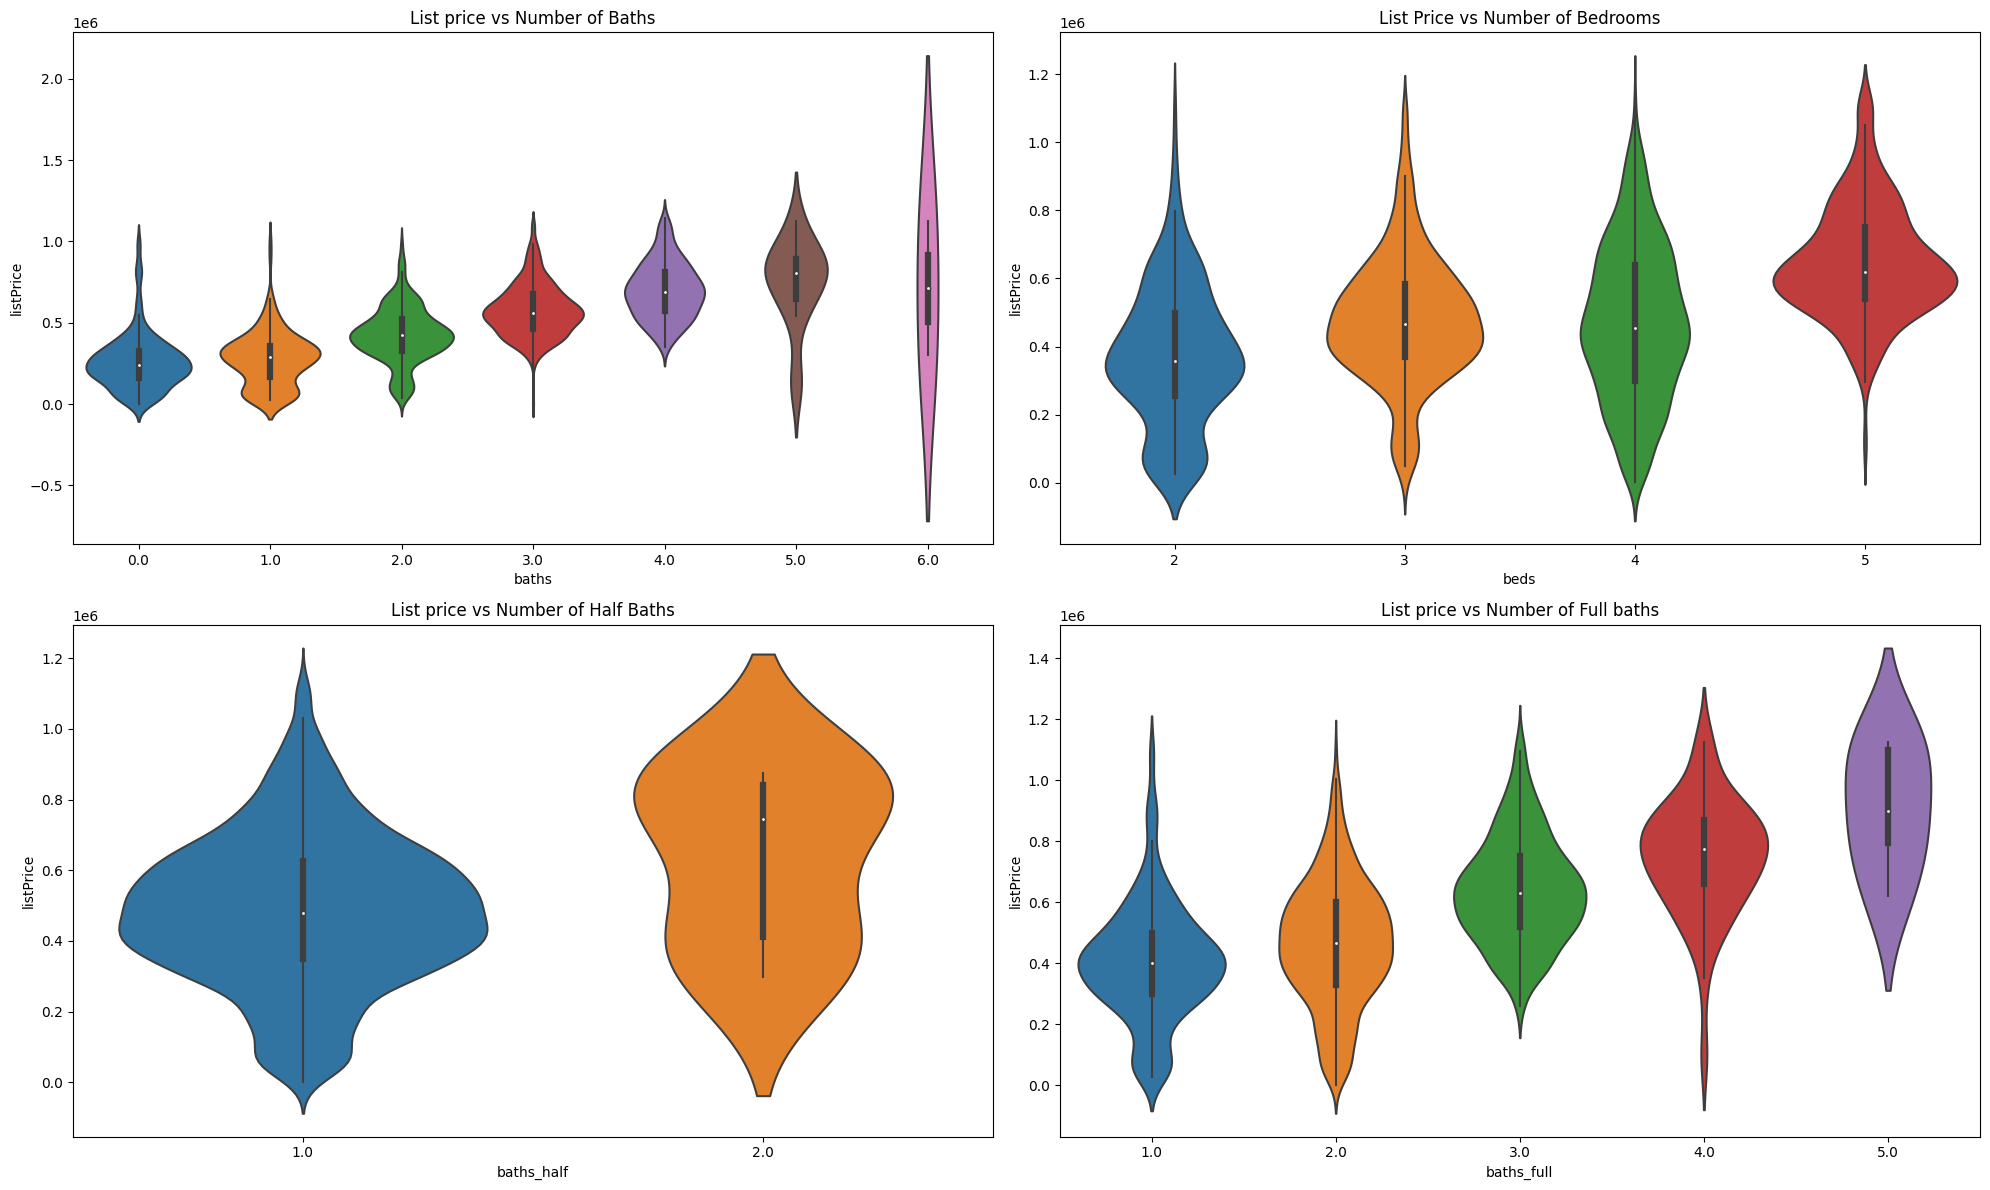

In [49]:
#violin plots
plt.figure(figsize=(20,12))

#list price vs baths
plt.subplot(2,2,1)
sns.violinplot(x='baths', y='listPrice', data=dfClean)
plt.title('List price vs Number of Baths')

#list price vs beds
plt.subplot(2,2,2)
sns.violinplot(x="beds", y="listPrice", data=dfClean)
plt.title("List Price vs Number of Bedrooms")

#list price vs baths half
plt.subplot(2,2,3)
sns.violinplot(x="baths_half", y="listPrice", data=dfClean)
plt.title("List price vs Number of Half Baths")

#list price vs full baths
plt.subplot(2,2,4)
sns.violinplot(x="baths_full", y="listPrice", data=dfClean)
plt.title("List price vs Number of Full baths")

plt.tight_layout()
plt.show

<a id='modelingPrepare'>

## Preparing Dataframe for Modeling

In [50]:
dfClean.drop(['lastSoldOn', 'stories'], axis=1, inplace=True)

In [51]:
dfClean.head(1)

,type,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,listPrice,status,age
0,single_family,1985,4,3.0,3.0,1.0,1,10019.0,3528.0,389900.0,for_sale,39


In [52]:
df_encoded = pd.get_dummies(dfClean, drop_first=True, dtype='int')

In [53]:
df_encoded.head(1)

,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,listPrice,age,type_land,type_mobile,type_other,type_single_family,type_townhome,status_ready_to_build
0,1985,4,3.0,3.0,1.0,1,10019.0,3528.0,389900.0,39,0,0,0,1,0,0


Separate Data into X and y

In [54]:
X = df_encoded.drop('listPrice', axis=1)
y = df_encoded['listPrice']

In [55]:
print(X.shape)
print(y.shape)

(2858, 15)
(2858,)


<a id='linearRegressionAssumptions'>

## Linear Regression Assumptions

<a id='linearity'>

### Linearity

<Figure size 600x600 with 0 Axes>

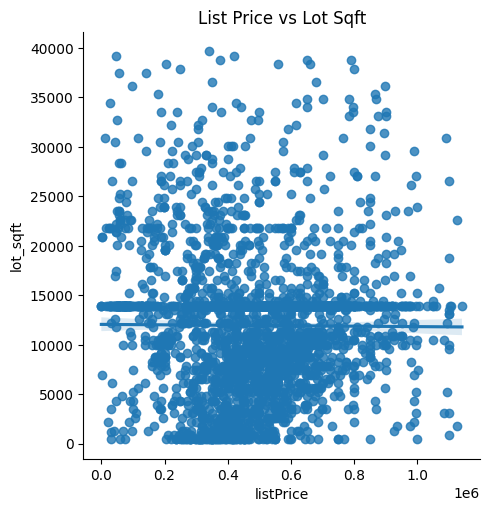

In [56]:
plt.figure(figsize=(6,6))
sns.lmplot(x='listPrice', y='lot_sqft', data=df_encoded)
plt.title("List Price vs Lot Sqft")
plt.show()

<Figure size 600x600 with 0 Axes>

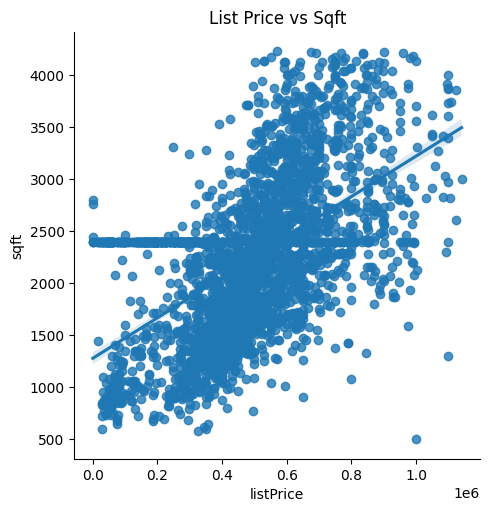

In [57]:
plt.figure(figsize=(6,6))
sns.lmplot(x='listPrice', y='sqft', data=df_encoded)
plt.title("List Price vs Sqft")
plt.show()

<Figure size 600x600 with 0 Axes>

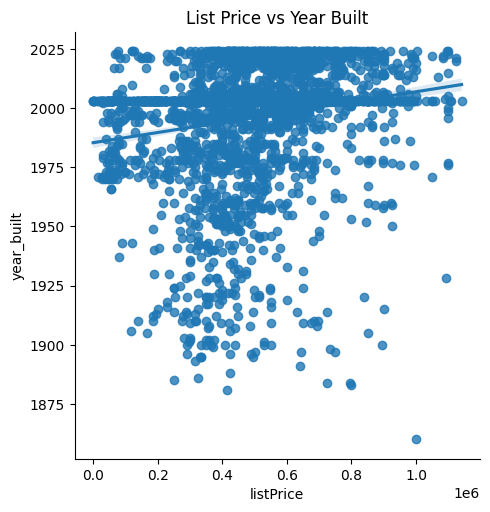

In [58]:
plt.figure(figsize=(6,6))
sns.lmplot(x='listPrice', y='year_built', data=df_encoded)
plt.title("List Price vs Year Built")
plt.show()

<Figure size 600x600 with 0 Axes>

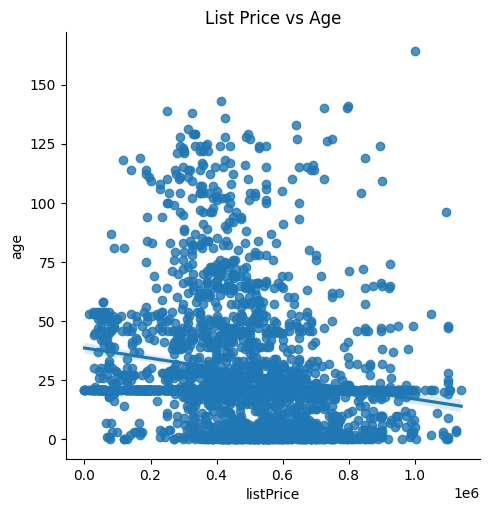

In [59]:
plt.figure(figsize=(6,6))
sns.lmplot(x='listPrice', y='age', data=df_encoded)
plt.title("List Price vs Age")
plt.show()

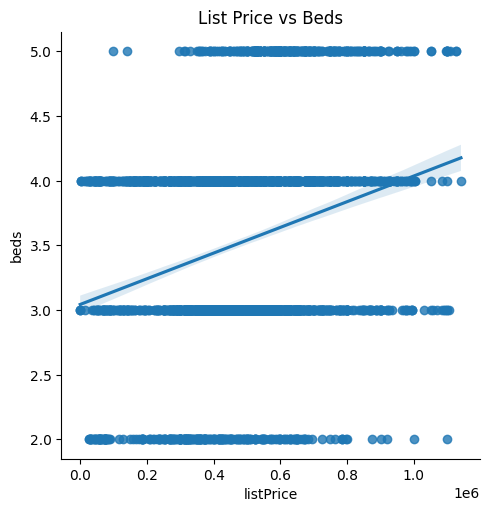

In [60]:
sns.lmplot(x='listPrice', y='beds', data=df_encoded)
plt.title("List Price vs Beds")
plt.show()

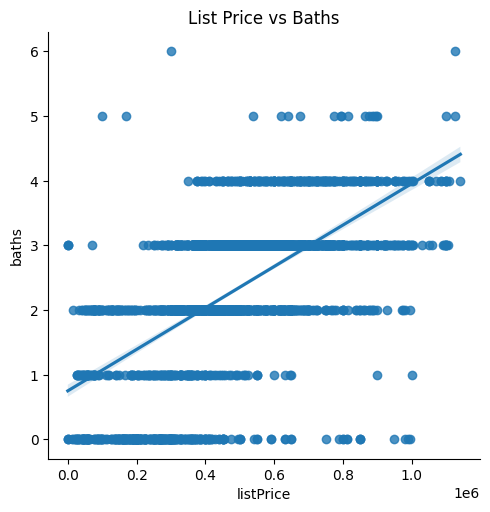

In [61]:
sns.lmplot(x='listPrice', y='baths', data=df_encoded)
plt.title("List Price vs Baths")
plt.show()

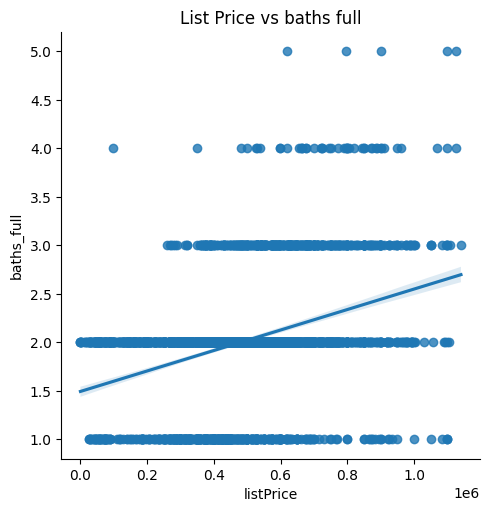

In [62]:
sns.lmplot(x='listPrice', y='baths_full', data=df_encoded)
plt.title("List Price vs baths full")
plt.show()

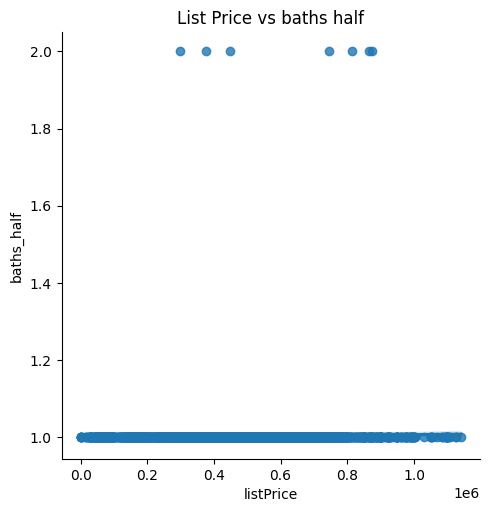

In [63]:
sns.lmplot(x='listPrice', y='baths_half', data=df_encoded)
plt.title("List Price vs baths half")
plt.show()

<a id='homoscedasticity'>

### Homoscedasticity

In [64]:
import statsmodels.api as sm

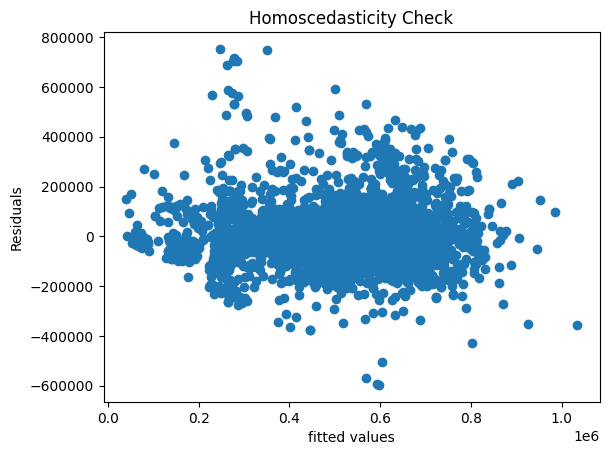

In [65]:
model = sm.OLS(y, X).fit()
residuals = model.resid
fitted = model.fittedvalues
plt.scatter(fitted, residuals)
plt.xlabel('fitted values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check')
plt.show()

<a id='multivariateNormality'>

### Multivariate Normality

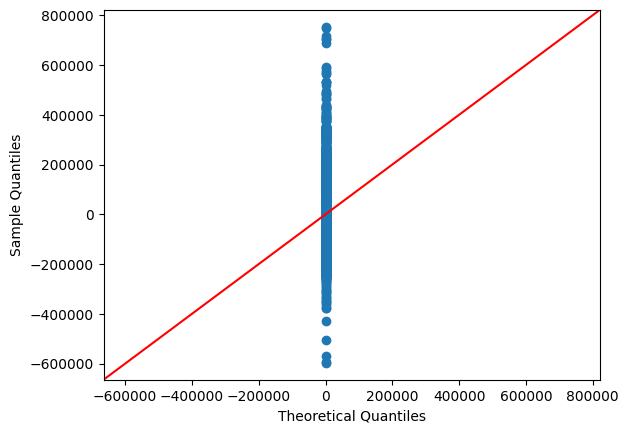

In [66]:
#The residuals of a normal distribution are a straight line
sm.qqplot(residuals, line='45')
plt.show()

<a id='autocorrelation'>

### Autocorrelation

In [67]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(model.resid)

1.9915517266331964

value of 1.99 indicates there is little to no autocorrelation in the residuals. This suggests the residuals from the regression model are not showing a pattern over time. This is desireable in a well-fitting regression model

<a id='multicollinearity'>

### Multicollinearity

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [69]:
#create dataframe to hold VIF values
vif_data = pd.DataFrame()
vif_data["feature"] = df_encoded.columns

#calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_encoded.values, i) for i in range(len(df_encoded.columns))]

print(vif_data)

                  feature         VIF
0              year_built  450.117690
1                    beds    1.846591
2                   baths    6.134002
3              baths_full    1.799754
4              baths_half    1.037132
5                  garage    1.317311
6                lot_sqft    1.384788
7                    sqft    2.438886
8               listPrice    2.718055
9                     age    3.221790
10              type_land    7.822649
11            type_mobile    2.324532
12             type_other    1.098992
13     type_single_family    5.906825
14          type_townhome    3.160901
15  status_ready_to_build    1.114909


#### VIF analysis

*Extremely High VIF
(year_built)
These features exhibit severely high multicollinearity. Consider removing these features or combining them with other features to reduce multicollinearity.

*High VIF
(baths, type_land, type_single_family)
These features exhibit high multicollinearity. Investigate these further to understand which features they are highly correlated with and consider removing them or tranforming them.

*Moderate VIF
(age, sqft, listPrice, type_mobile, type_townhome)
These exhibit moderate collinearity. These don't appear to cause issues now, but keep an eye on them during modeling

*Low VIF
(beds, baths_full, baths_half, garage, lot_sqft, type_other, status_ready_to_build)
These have low multicollinearity. These are generally safe to keep in the model

<a id='featureengineering'>

## Feature Engineering

<a id='reducemulticollinearity'>

### Reduce multicollinearity

In [70]:
#combine baths, baths_full, baths_half into one feature
df_encoded['total_baths'] = df_encoded['baths'] + df_encoded['baths_full'] + (.5* df_encoded['baths_half'])
df_encoded = df_encoded.drop(columns=['baths', 'baths_full', 'baths_half'])
print(df_encoded.columns)

Index(['year_built', 'beds', 'garage', 'lot_sqft', 'sqft', 'listPrice', 'age',
       'type_land', 'type_mobile', 'type_other', 'type_single_family',
       'type_townhome', 'status_ready_to_build', 'total_baths'],
      dtype='object')


In [71]:
#drop year_built
df_encoded.drop(columns=["year_built"], inplace=True)
print(df_encoded.columns)

Index(['beds', 'garage', 'lot_sqft', 'sqft', 'listPrice', 'age', 'type_land',
       'type_mobile', 'type_other', 'type_single_family', 'type_townhome',
       'status_ready_to_build', 'total_baths'],
      dtype='object')


In [72]:
df_encoded['price_sqft_ratio'] = dfClean['listPrice'] / dfClean['sqft']

In [73]:
print(df_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2858 entries, 0 to 2857
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   beds                   2858 non-null   int64  
 1   garage                 2858 non-null   int64  
 2   lot_sqft               2858 non-null   float64
 3   sqft                   2858 non-null   float64
 4   listPrice              2858 non-null   float64
 5   age                    2858 non-null   int64  
 6   type_land              2858 non-null   int64  
 7   type_mobile            2858 non-null   int64  
 8   type_other             2858 non-null   int64  
 9   type_single_family     2858 non-null   int64  
 10  type_townhome          2858 non-null   int64  
 11  status_ready_to_build  2858 non-null   int64  
 12  total_baths            2858 non-null   float64
 13  price_sqft_ratio       2858 non-null   float64
dtypes: float64(5), int64(9)
memory usage: 312.7 KB
None


In [74]:
df_encoded = df_encoded[['listPrice', 'beds', 'garage', 'sqft', 'age', 'lot_sqft', 'price_sqft_ratio', 'total_baths',\
                        'type_land', 'type_mobile', 'type_other', 'type_single_family', 'type_townhome', 'status_ready_to_build']]

In [75]:
#drop nan values
df_encoded.dropna(inplace=True)

In [76]:
print(df_encoded.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2858 entries, 0 to 2857
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   listPrice              2858 non-null   float64
 1   beds                   2858 non-null   int64  
 2   garage                 2858 non-null   int64  
 3   sqft                   2858 non-null   float64
 4   age                    2858 non-null   int64  
 5   lot_sqft               2858 non-null   float64
 6   price_sqft_ratio       2858 non-null   float64
 7   total_baths            2858 non-null   float64
 8   type_land              2858 non-null   int64  
 9   type_mobile            2858 non-null   int64  
 10  type_other             2858 non-null   int64  
 11  type_single_family     2858 non-null   int64  
 12  type_townhome          2858 non-null   int64  
 13  status_ready_to_build  2858 non-null   int64  
dtypes: float64(5), int64(9)
memory usage: 334.9 KB
None


<a id='correlation'>

### Correlation

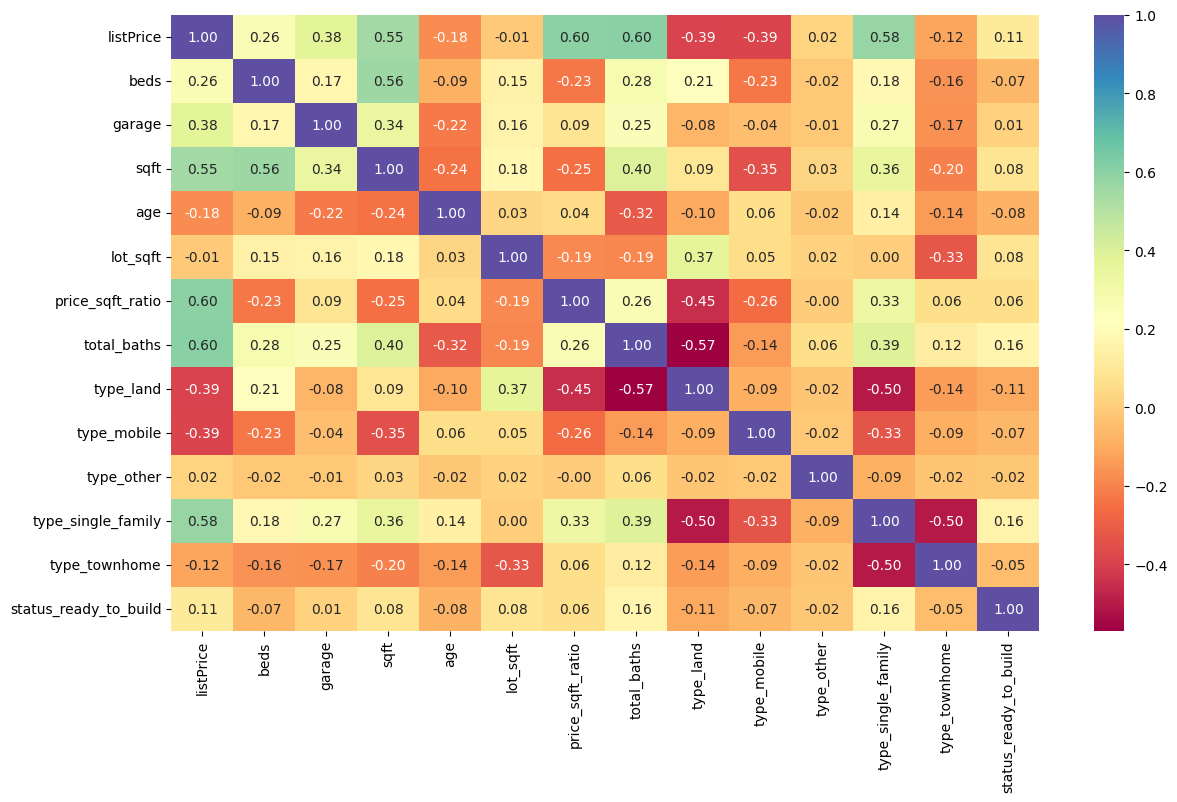

In [77]:
corr_matrix = df_encoded.corr()
plt.figure(figsize=(14,8))
sns.heatmap(corr_matrix, annot=True, cmap='Spectral', fmt='.2f')
plt.show()

<a id='dataReduction'>

## Data Reduction Analysis

In [78]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
#H0: Variables are orthogonal; not correlated
#H1: Variables are not orthogonal; diverges significantly from the identity matrix
chi_square, p_value = calculate_bartlett_sphericity(df_encoded)
print(f"chi-square value: {chi_square}")
print(f"p-value: {p_value:.3f}")

chi-square value: 20521.77442225068
p-value: 0.000


#### p < 0.05 : correlation matrix is not an identity matrix
#### p > 0.05 : not enough to reject H0

In [79]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(df_encoded)
print(f"KMO Value: {kmo_model}")

KMO Value: 0.4961923726978001


#### KMO (0.7 -> 1.0): adequate sampling, proceed with factor analysis
#### KMO (0.0 -> 0.6): inadequate sampling, don't proceed with factor analysis

<a id='modeling'>

## Modeling

In [80]:
from sklearn.model_selection import learning_curve

In [81]:
#This method shows the learning curve of models using K-Fold (K=5) with MSE & R2 Metrics
def plot_learning_curve(model, X, y):
    train_sizes_mse, train_scores_mse, test_scores_mse = learning_curve(model, X, y, cv=5, scoring='neg_mean_squared_error')
    train_sizes_r2, train_scores_r2, test_scores_r2 = learning_curve(model, X, y, cv=5, scoring='r2')
    
    train_scores_mean_mse = -np.mean(train_scores_mse, axis=1)
    test_scores_mean_mse = -np.mean(test_scores_mse, axis=1)
    
    train_scores_mean_r2 = np.mean(train_scores_r2, axis=1)
    test_scores_mean_r2 = np.mean(test_scores_r2, axis=1)
    
    plt.figure(figsize=(10,6))
    plt.plot(train_sizes_mse, train_scores_mean_mse, 'o-', color="r", label="Training Score MSE")
    plt.plot(train_sizes_mse, test_scores_mean_mse, 'o-', color="g", label="Cross-Validation MSE")
    plt.xlabel("Training Examples")
    plt.ylabel("MSE")
    plt.title("Learning Curves")
    plt.legend(loc="best")
    plt.show()
    
    plt.figure(figsize=(10,6))
    plt.plot(train_sizes_r2, train_scores_mean_r2, 'o-', color="r", label="Training Score R2")
    plt.plot(train_sizes_r2, test_scores_mean_r2, 'o-', color="g", label="Cross-Validation R2")
    plt.xlabel("Training Examples")
    plt.ylabel("R2")
    plt.title("Learning Curves")
    plt.legend(loc="best")
    plt.show()
    

In [82]:
#import libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso, Ridge, LinearRegression, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

<a id='linearregression'>

### Linear Regression

In [83]:
X = df_encoded.drop(["listPrice"], axis=1).values
y = df_encoded['listPrice'].values

#splitting test and train and fitting the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = model.score(X_test, y_test)
print("Mean Squared Error: ", mse)
print("R2 Score: ", r2)
print("Score: ", score)

Mean Squared Error:  3364245100.1218257
R2 Score:  0.922899467169179
Score:  0.922899467169179


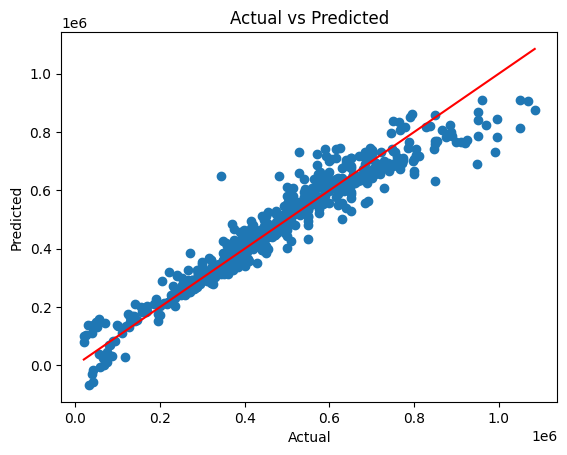

In [84]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test),max(y_test)], color='red')
plt.show()

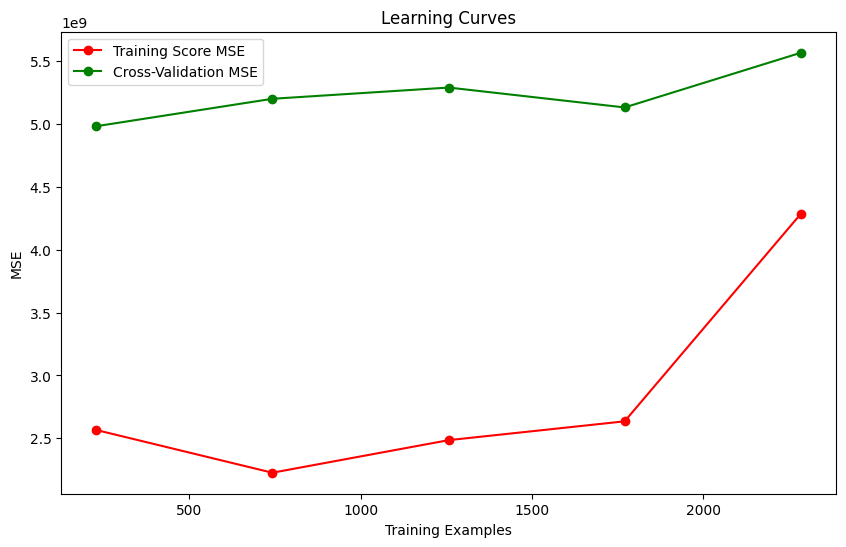

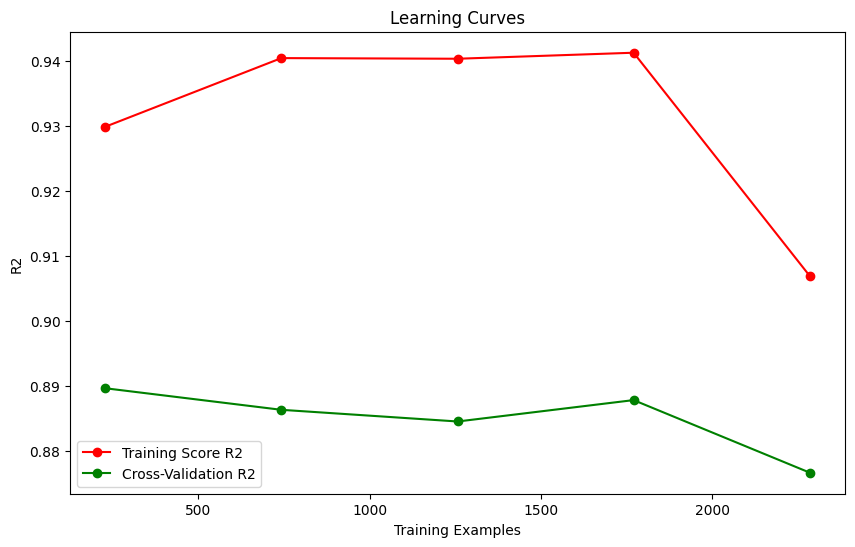

In [85]:
plot_learning_curve(model, X, y)

<a id='ridgeregression'>

### Ridge Regression

In [86]:
X = df_encoded.drop(['listPrice'], axis=1).values
y = df_encoded['listPrice'].values

#scaling
y = y.reshape(len(y), 1) #change to column vector
scaler_X = MinMaxScaler() #scale between 0 - 1
scaler_y = MinMaxScaler()

X = scaler_X.fit_transform(X) #makes dataset have zero mean and unit variance, done by the column: xi - mean / std
y = scaler_y.fit_transform(y)

#splitting test and train sets and fitting the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

ridge = Ridge()

ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Square Error: ", mse)
print("R2: ", r2)

Mean Square Error:  0.0039868954745220135
R2:  0.8810479083054075


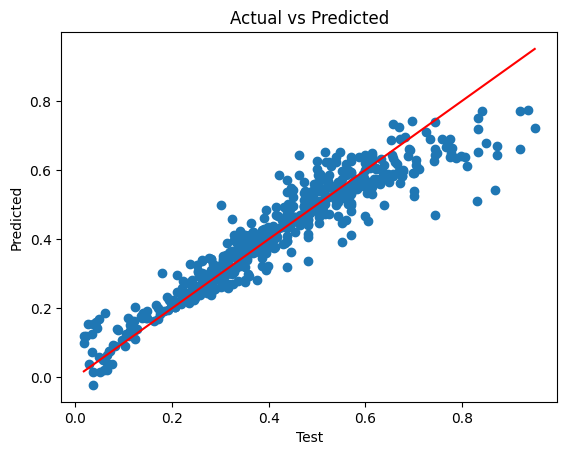

In [87]:
plt.scatter(y_test, y_pred)
plt.xlabel("Test")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.plot([min(y_test), max(y_test)],[min(y_test), max(y_test)], color='red')
plt.show()

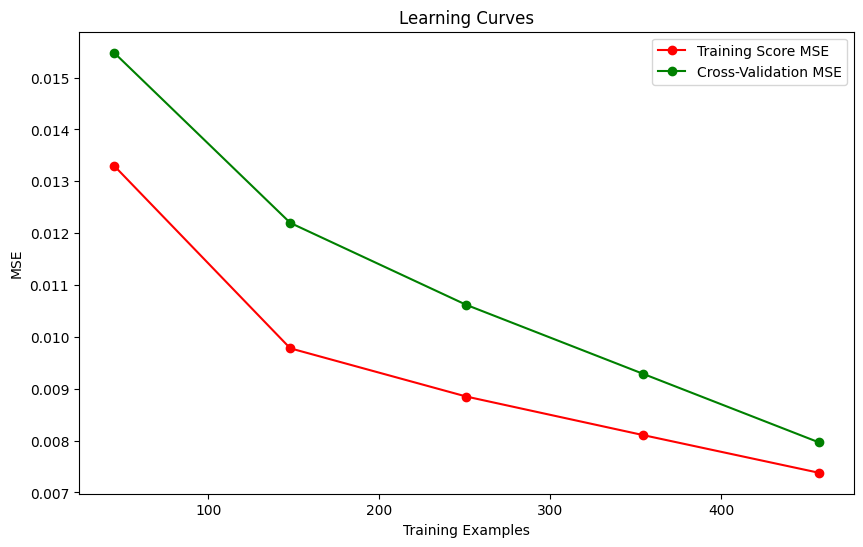

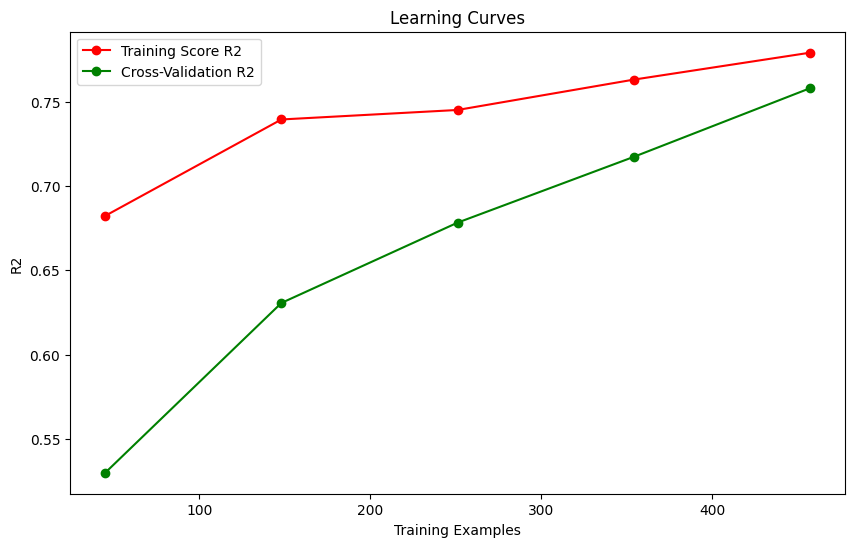

In [88]:
plot_learning_curve(ridge, X_test, y_test)

<a id='polynomialregression'>

### Polynomial Regression

r2_score:  0.922899467169177
mse:  0.00258416444004757


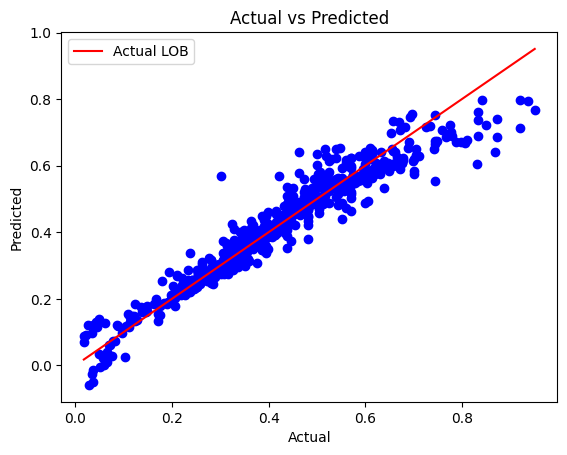

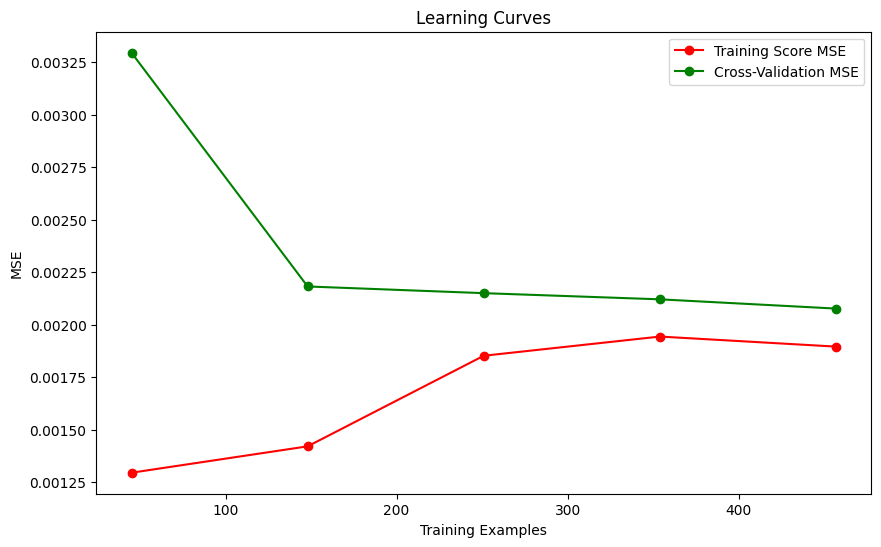

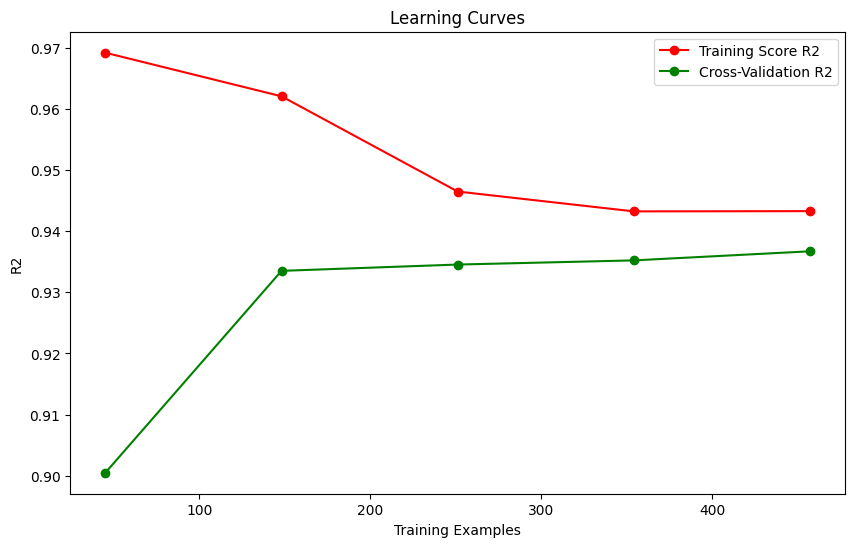

In [89]:
X = df_encoded.drop(['listPrice'], axis=1).values
y = df_encoded['listPrice'].values

#scaling
y = y.reshape(len(y), 1) #column vector
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y)

#split training and test sets and fit model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#X_train_poly = pf.fit_transform(X_train)
#print(X_train_poly.shape)
#X_test_poly = pf.transform(X_test)
#print(X_test_poly.shape)


def PolyPipeline(degree):
    lr = LinearRegression()
    pf = PolynomialFeatures(degree=degree, include_bias=False)
    
    X_train_poly = pf.fit_transform(X_train)
    #print(X_train.shape)
    X_test_poly = pf.transform(X_test)
    #print(X_test.shape)
    
    pipe = Pipeline([\
                    ("pf", pf),\
                    ("lr", lr)
                    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print("r2_score: ", r2_score(y_test, y_pred))
    print("mse: ", mean_squared_error(y_test, y_pred))
    
    plt.scatter(y_test, y_pred, color='b')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r', label="Actual LOB")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title("Actual vs Predicted")
    plt.legend(loc='upper left')
    plt.show()
    
    plot_learning_curve(lr, X_test_poly, y_test)

PolyPipeline(1)
#PolyPipeline(2)
#PolyPipeline(3)


<a id='elasticnetregression'>

### Elastic Net Regression

r2:  0.9231600488569098
mse:  3352874742.0459166


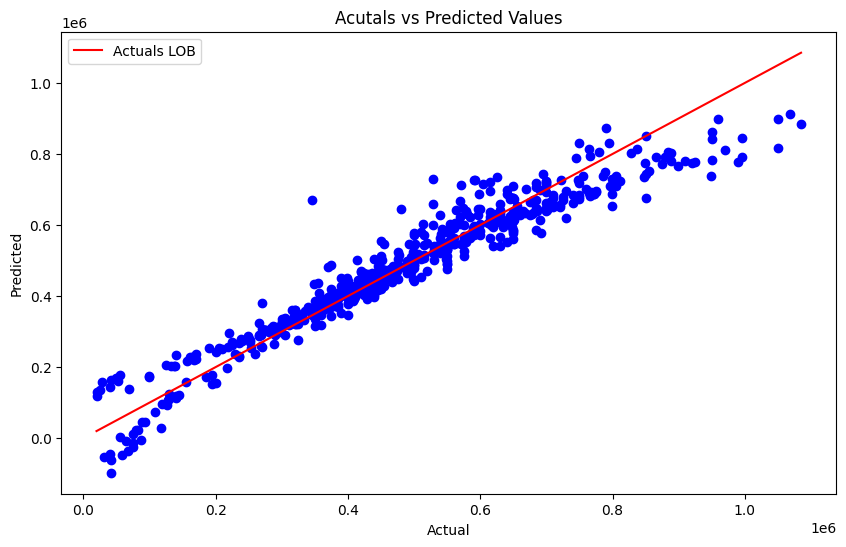

In [90]:
X = df_encoded.drop(["listPrice"], axis=1).values
y = df_encoded['listPrice'].values

#split data into train and test sets and train model
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
en = ElasticNet()
en.fit(X_train, y_train)
y_pred = en.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("r2: ", r2)
print("mse: ", mse)

plt.figure(figsize=(10,6))
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], color='r', label="Actuals LOB")
plt.scatter(y_test, y_pred, color='b')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Acutals vs Predicted Values")
plt.legend(loc='upper left')
plt.show()

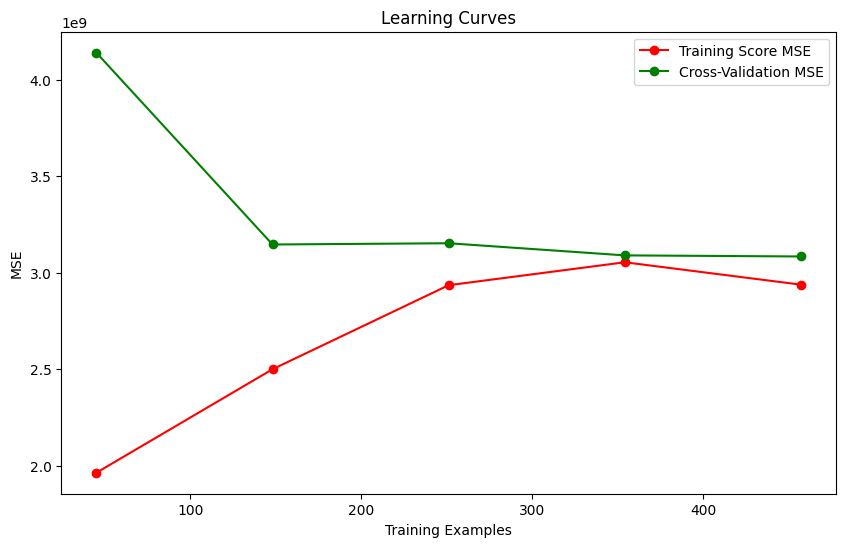

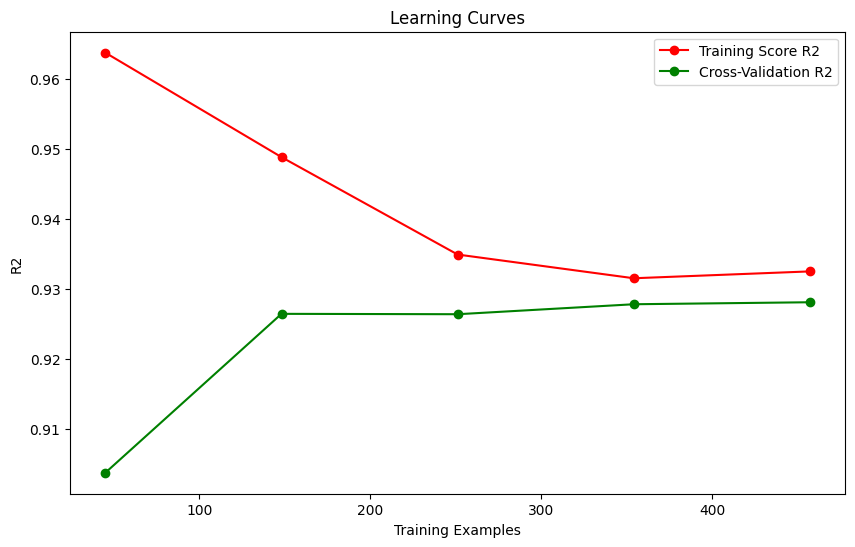

In [91]:
plot_learning_curve(en, X_test, y_test)

<a id='ENTuned'>

### Elastic Net w/ GridSearchCV Tuning

In [92]:
import warnings
warnings.filterwarnings('ignore')

en2 = ElasticNet() #define model

#define hyperparameter grid
en_params = {
    'alpha': [0.01, 0.05, 1, 10, 100],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
    'fit_intercept': [True, False],
    'max_iter': [100, 200, 500, 1000, 1500],
    'precompute': [True, False],
    'selection': ['cyclic', 'random']
}

#initialize GridSearchCV with MSE scoring
grid_search_en_mse = GridSearchCV(estimator=en2, param_grid=en_params, scoring='neg_mean_squared_error', cv=5)

#fit model
grid_search_en_mse.fit(X_train, y_train)

#Best hyperparameters and MSE Score
print("Best Hyperparameters for Elastic Net Search Regression: ", grid_search_en_mse.best_params_)
print("Best MSE CV Score for Elastic Net Search Regression: ", grid_search_en_mse.best_score_)


#initialize GridSearchCV with r2 scoring
grid_search_en_r2 = GridSearchCV(estimator=en2, param_grid=en_params, scoring='r2', cv=5)

#fit model
grid_search_en_r2.fit(X_train, y_train)

#Best hyperparameters and R2 Score
print("Best Hyperparameters for Elastic Net Search Regression: ", grid_search_en_r2.best_params_)
print("Best R2 CV Score for Elastic Net Search Regression: ", grid_search_en_r2.best_score_)

Best Hyperparameters for Elastic Net Search Regression:  {'alpha': 0.05, 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 1500, 'precompute': False, 'selection': 'random'}
Best MSE CV Score for Elastic Net Search Regression:  -5629696719.971721
Best Hyperparameters for Elastic Net Search Regression:  {'alpha': 0.05, 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 200, 'precompute': False, 'selection': 'random'}
Best R2 CV Score for Elastic Net Search Regression:  0.877567671405739


In [93]:
#get parameters from gridsearchcv for both MSE and R2 scoring for comparison
params_mse = grid_search_en_mse.best_params_
params_r2 = grid_search_en_r2.best_params_

#initialize Elastic Net models with hyperparameters 
en_tuned_mse = ElasticNet(**params_mse)
en_tuned_r2 = ElasticNet(**params_r2)

In [94]:
#Fit and Score EN model based on MSE scoring GridsearchCV best params
en_tuned_mse.fit(X_train, y_train)
y_pred = en_tuned_mse.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("R2", r2)

MSE:  3338258849.0970054
R2 0.9234950105201128


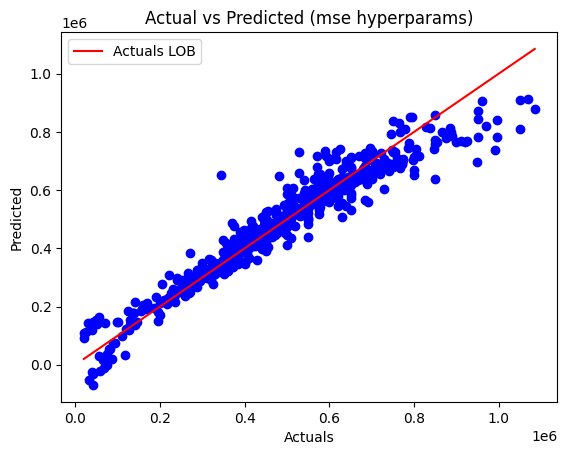

In [95]:
#Plot en_tuned_mse model actuals vs predictions
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], color='r', label='Actuals LOB')
plt.xlabel("Actuals")
plt.ylabel("Predicted")
plt.legend(loc="upper left")
plt.title("Actual vs Predicted (mse hyperparams)")
plt.show()

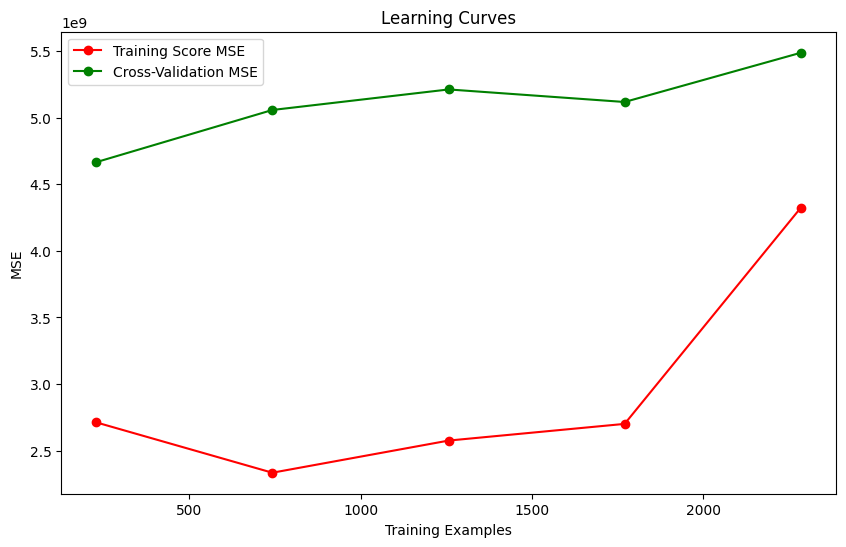

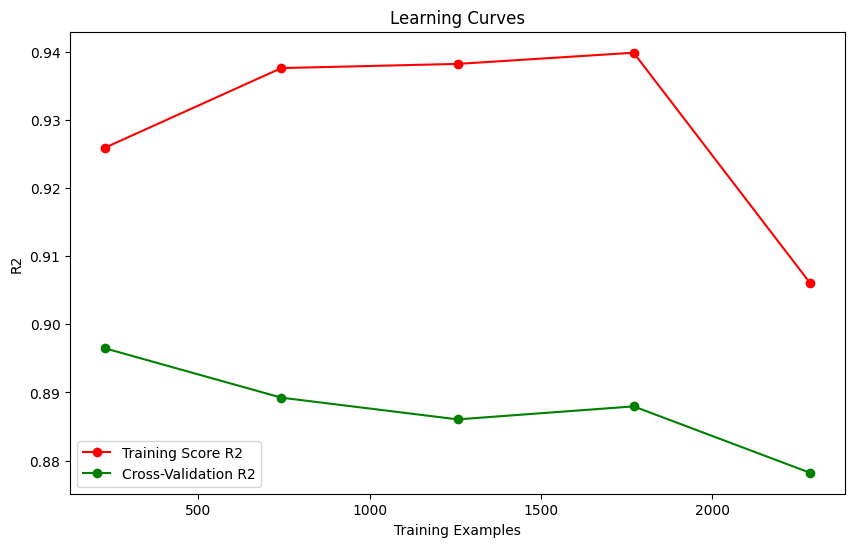

In [96]:
plot_learning_curve(en_tuned_mse, X, y)

In [97]:
#Fit and Score EN model based on R2 scoring GridsearchCV best params
en_tuned_r2.fit(X_train, y_train)
y_pred = en_tuned_r2.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("R2", r2)

MSE:  3338258855.096678
R2 0.9234950103826145


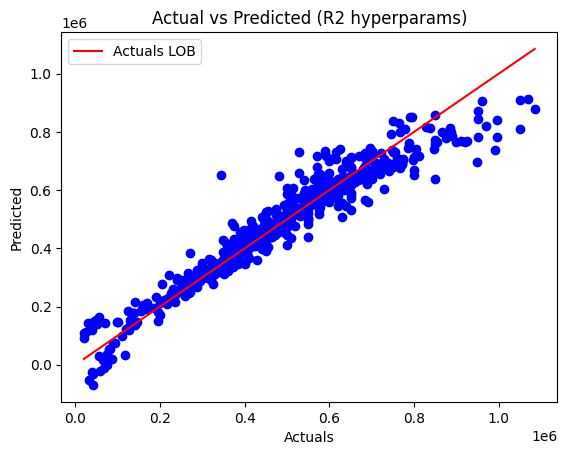

In [98]:
#Plot en_tuned_r2 model actuals vs predictions
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], color='r', label='Actuals LOB')
plt.xlabel("Actuals")
plt.ylabel("Predicted")
plt.legend(loc="upper left")
plt.title("Actual vs Predicted (R2 hyperparams)")
plt.show()

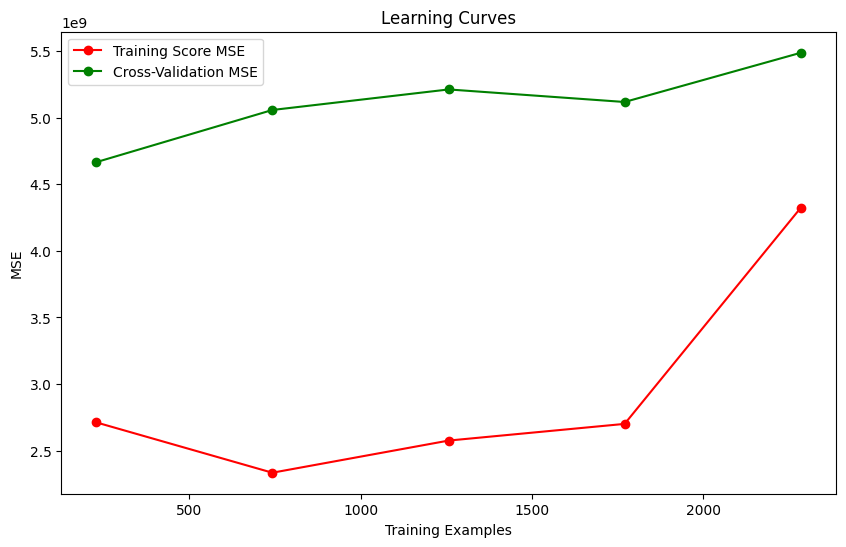

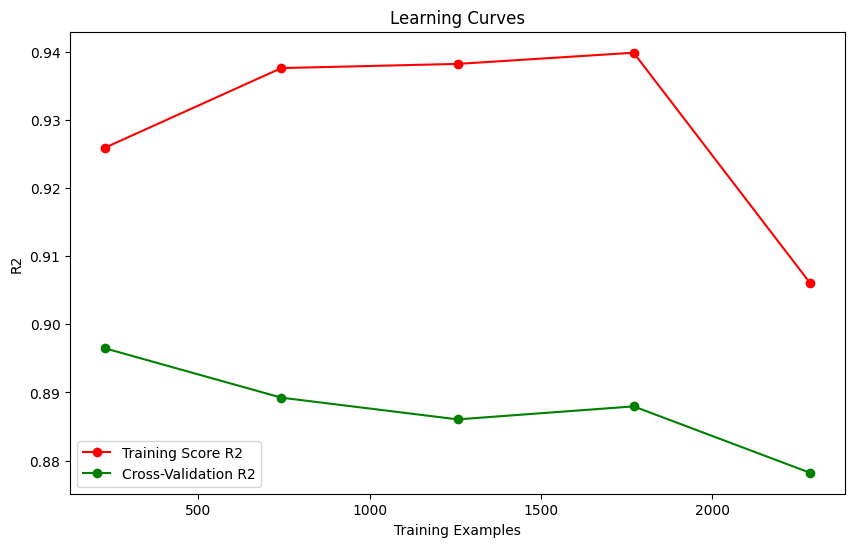

In [99]:
plot_learning_curve(en_tuned_r2, X, y)

<a id='randomforest'>

### Random Forest Regression

In [100]:
X = df_encoded.drop(['listPrice'], axis=1)
y = df_encoded['listPrice']

#splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(oob_score=True) #initialize model with default hyperparameters
rf.fit(X_train, y_train) #train model
oob_score = rf.oob_score_ #check performance of bagging algorithm
print(f"Out-Of-Bag Score: {oob_score}")

y_pred = rf.predict(X_test) #evaluate model using test set

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'R2: {r2}')
print(f'MSE: {mse}')

Out-Of-Bag Score: 0.9930080091901425
R2: 0.9973787588409702
MSE: 114376611.96004756


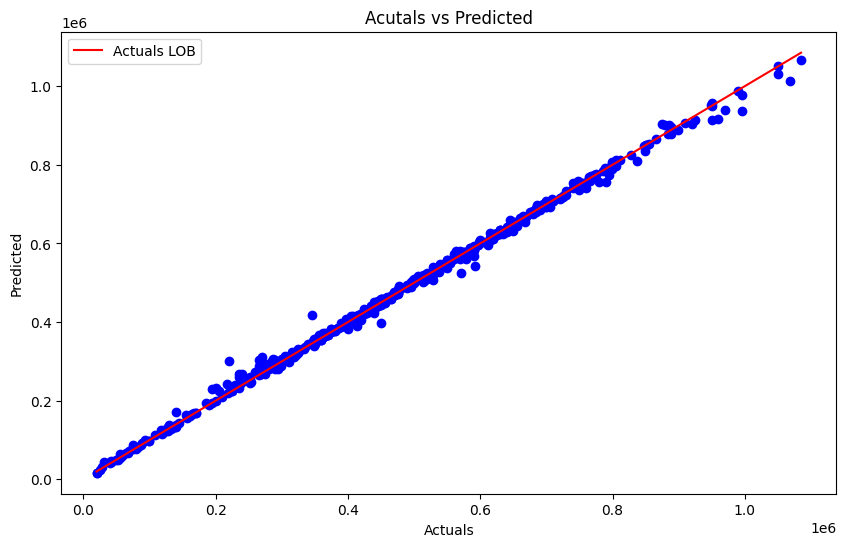

In [101]:
#Visualize model prediction vs Actuals
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred, color='b')
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], label='Actuals LOB', color='r')
plt.xlabel("Actuals")
plt.ylabel("Predicted")
plt.title("Acutals vs Predicted")
plt.legend(loc='upper left')
plt.show()

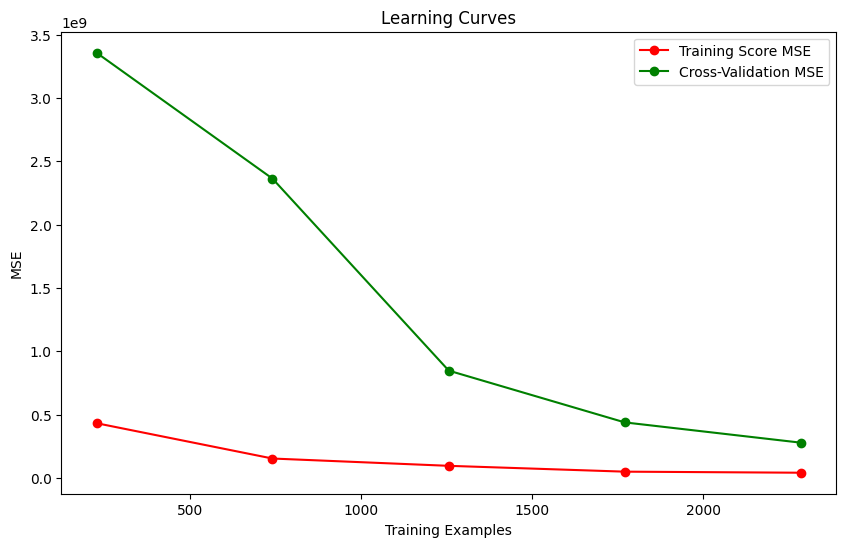

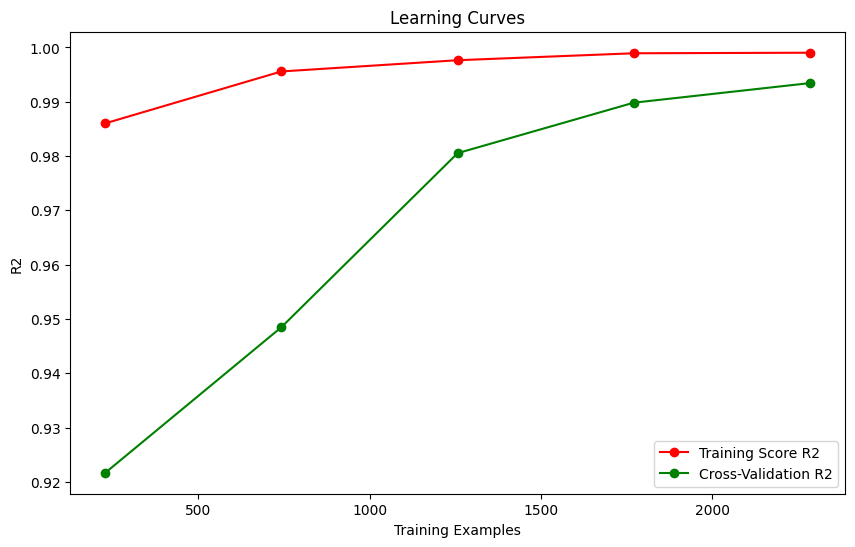

In [102]:
plot_learning_curve(rf, X, y)

<a id='RFTuned'>

### Randomized Search CV 

In [103]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor() #define model

#define hyperparameter grid
rf_params = {
    'n_estimators': [100,200,300,400,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8]
}

random_search = RandomizedSearchCV(estimator=rf, param_distributions=rf_params, cv=10) #Initialize RandomSearchCV
random_search.fit(X_train, y_train) #Fit Model

#get best parameters and score
print(f'Best hyperparameters for Random Forest Regression: {random_search.best_params_}')
print(f"Cross-Validation Score: {random_search.best_score_}")

Best hyperparameters for Random Forest Regression: {'n_estimators': 200, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None}
Cross-Validation Score: 0.989034344232157


In [104]:
#Initialize Random Forest Regression model with best hyperparameters
best_params_fr = random_search.best_params_
rf_tuned = RandomForestRegressor(**best_params_fr, bootstrap=True, oob_score=True)

rf_tuned.fit(X_train, y_train)
print(f"OOB Score: {rf_tuned.oob_score_}") #Check model performance on unseen data

y_pred = rf_tuned.predict(X_test) #evaluate performance of model with test set

#check generalization score R2
print(f"R2 Score: {r2_score(y_test,y_pred)}")

#Print evaluation Metric MSE
print(f"MSE: {mean_squared_error(y_test,y_pred)}")

OOB Score: 0.9903029764386297
R2 Score: 0.9949242199607098
MSE: 221479249.22837982


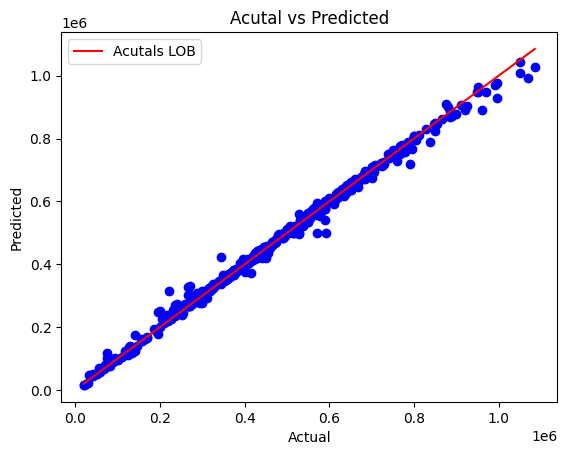

In [105]:
plt.scatter(y_test, y_pred, color='b')
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], color="r", label="Acutals LOB")
plt.title("Acutal vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend(loc='upper left')
plt.show()

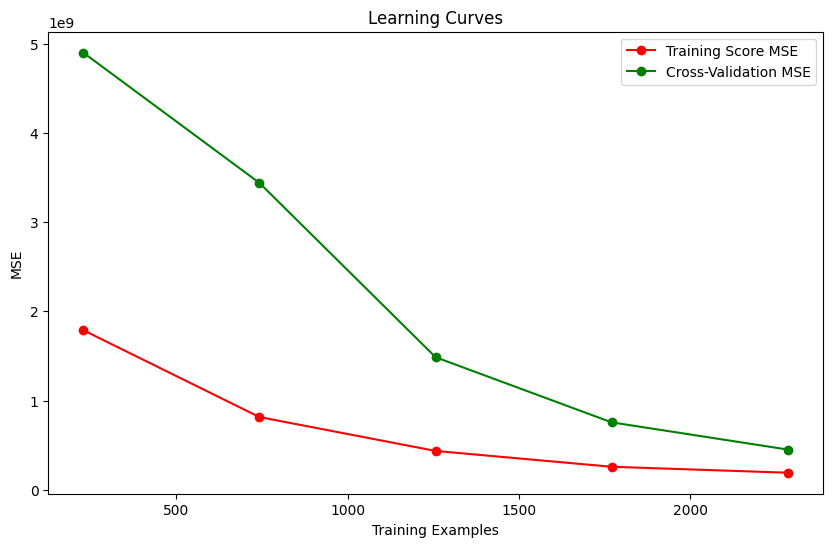

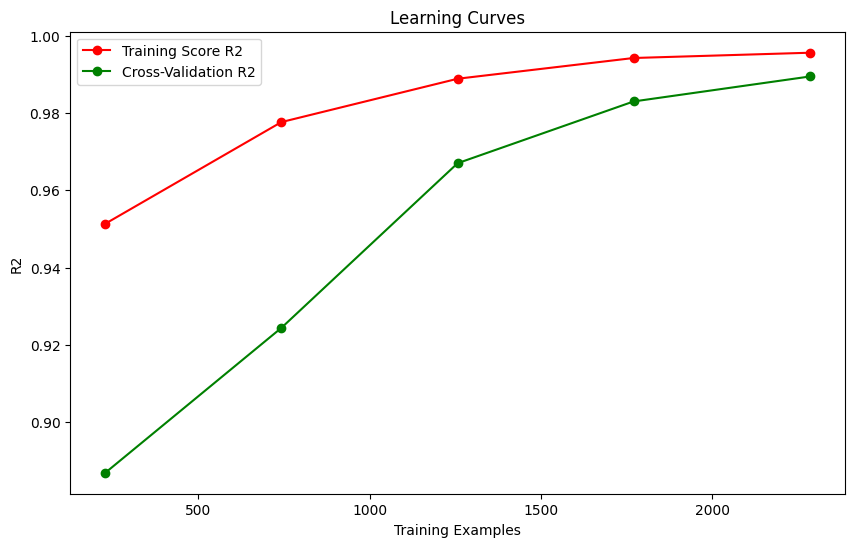

In [106]:
plot_learning_curve(rf_tuned, X, y)